In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Activation, Dropout
from keras.layers import LeakyReLU
from keras import initializers
from keras.datasets import fashion_mnist
from keras.optimizers import Adam
import random
import matplotlib.pyplot as plt

In [25]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

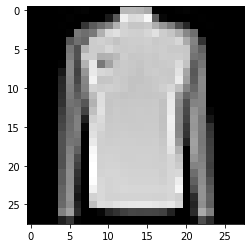

In [26]:
x_train = (x_train.astype(np.float32) - 127.5) / 127.5

SUB_SIZE = 10000

x_train = x_train[:SUB_SIZE]
y_train = x_train[:SUB_SIZE]

x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

plt.imshow(x_train[random.randint(0, SUB_SIZE)].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()

In [27]:
# How many noise dimensions our generator should take in
NOISE_DIM = 100

def generator():
    model = Sequential()
    model.add(Dense(256, 
                    input_dim=100, 
                    kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    model.add(LeakyReLU())
    model.add(Dense(512))
    model.add(LeakyReLU())
    model.add(Dense(1024))
    model.add(LeakyReLU())
    model.add(Dense(784))
    model.add(Activation('tanh'))
    
    return model

In [28]:
def discriminator():
    model = Sequential()
    model.add(Dense(1024, 
                    input_dim=784, 
                    kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    model.add(LeakyReLU())
    model.add(Dropout(.3))
    model.add(Dense(512))
    model.add(LeakyReLU())
    model.add(Dropout(.3))
    model.add(Dense(256))
    model.add(LeakyReLU())
    model.add(Dropout(.3))
    model.add(Dense(1, activation = 'sigmoid'))

    return model

In [29]:
def combine(generator, discriminator):
    model = Sequential()
    model.add(generator)
    discriminator.trainable = False
    model.add(discriminator)
    return model

In [30]:
LOSS = 'binary_crossentropy'
OPTIMIZER = Adam(lr=0.0002, 
                 beta_1=0.5)

d = discriminator()
d.compile(loss=LOSS, 
          optimizer=OPTIMIZER)

g = generator()
g.compile(loss=LOSS, 
          optimizer=OPTIMIZER)

dg = combine(g, d)
dg.compile(loss=LOSS, 
           optimizer=OPTIMIZER)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [31]:
# Helper function to display sample from the network
def disp_sample(g):
    noise = np.random.uniform(-1, 1, size=(batch_size, NOISE_DIM))
    generated_images = g.predict(noise, verbose=0)
    show_im = generated_images[0]
    show_im = (show_im + 1) / 2.0
    show_im = show_im.reshape(28, 28)
    plt.imshow(show_im, cmap='gray')
    plt.show()

Epoch #0


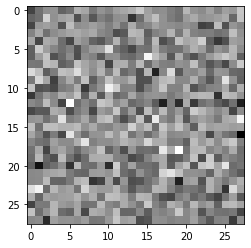

Number batches 78
0(0/78) D: 0.4029, G: 0.6988
0(1/78) D: 0.3787, G: 0.6802
0(2/78) D: 0.3780, G: 0.6577
0(3/78) D: 0.3920, G: 0.6395
0(4/78) D: 0.4114, G: 0.6198
0(5/78) D: 0.4236, G: 0.6092
0(6/78) D: 0.4340, G: 0.6184
0(7/78) D: 0.4342, G: 0.6390
0(8/78) D: 0.4242, G: 0.6814
0(9/78) D: 0.4130, G: 0.7204
0(10/78) D: 0.4081, G: 0.7585
0(11/78) D: 0.3987, G: 0.7768
0(12/78) D: 0.4048, G: 0.7869
0(13/78) D: 0.4142, G: 0.8079
0(14/78) D: 0.4301, G: 0.7898
0(15/78) D: 0.4437, G: 0.7843
0(16/78) D: 0.4491, G: 0.7881
0(17/78) D: 0.4442, G: 0.8132
0(18/78) D: 0.4270, G: 0.8591
0(19/78) D: 0.3963, G: 0.9087
0(20/78) D: 0.3706, G: 0.9727
0(21/78) D: 0.3655, G: 0.9683
0(22/78) D: 0.3697, G: 0.9868
0(23/78) D: 0.3676, G: 1.0074
0(24/78) D: 0.3817, G: 0.9685
0(25/78) D: 0.3785, G: 0.9597
0(26/78) D: 0.3785, G: 0.9504
0(27/78) D: 0.3678, G: 0.9461
0(28/78) D: 0.3675, G: 0.9588
0(29/78) D: 0.3623, G: 0.9457
0(30/78) D: 0.3734, G: 0.9427
0(31/78) D: 0.3722, G: 0.9504
0(32/78) D: 0.3674, G: 0.9426
0(

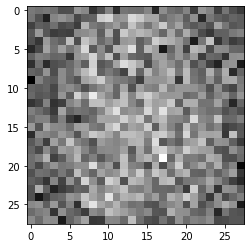

Number batches 78
1(0/78) D: 0.1709, G: 2.3411
1(1/78) D: 0.1812, G: 2.7035
1(2/78) D: 0.1382, G: 2.5255
1(3/78) D: 0.1181, G: 2.5327
1(4/78) D: 0.1127, G: 2.5011
1(5/78) D: 0.1091, G: 2.4222
1(6/78) D: 0.1212, G: 2.4445
1(7/78) D: 0.1251, G: 2.3992
1(8/78) D: 0.1111, G: 2.6078
1(9/78) D: 0.0879, G: 2.8409
1(10/78) D: 0.0682, G: 3.0071
1(11/78) D: 0.0562, G: 3.0116
1(12/78) D: 0.0677, G: 2.8601
1(13/78) D: 0.0581, G: 2.8877
1(14/78) D: 0.0543, G: 3.0313
1(15/78) D: 0.0470, G: 3.2125
1(16/78) D: 0.0491, G: 3.1686
1(17/78) D: 0.0436, G: 3.0441
1(18/78) D: 0.0492, G: 3.1497
1(19/78) D: 0.0474, G: 3.4412
1(20/78) D: 0.0373, G: 3.7142
1(21/78) D: 0.0306, G: 3.6601
1(22/78) D: 0.0361, G: 3.2329
1(23/78) D: 0.0687, G: 4.0942
1(24/78) D: 0.0461, G: 3.5726
1(25/78) D: 0.0569, G: 4.7315
1(26/78) D: 0.0402, G: 3.0625
1(27/78) D: 0.1456, G: 6.2689
1(28/78) D: 0.3331, G: 0.6466
1(29/78) D: 1.2800, G: 0.8858
1(30/78) D: 0.8032, G: 2.2082
1(31/78) D: 0.1917, G: 3.5202
1(32/78) D: 0.1308, G: 2.6126
1(

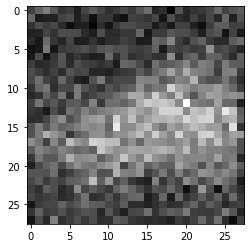

Number batches 78
2(0/78) D: 0.6479, G: 2.3784
2(1/78) D: 0.2245, G: 3.6911
2(2/78) D: 0.4077, G: 0.5765
2(3/78) D: 0.6279, G: 1.0768
2(4/78) D: 0.3403, G: 3.0687
2(5/78) D: 0.2702, G: 1.9741
2(6/78) D: 0.2320, G: 1.5753
2(7/78) D: 0.2605, G: 2.4397
2(8/78) D: 0.2873, G: 1.4670
2(9/78) D: 0.3053, G: 2.6555
2(10/78) D: 0.1871, G: 2.6368
2(11/78) D: 0.3018, G: 0.9022
2(12/78) D: 0.4732, G: 3.5602
2(13/78) D: 0.3331, G: 1.2830
2(14/78) D: 0.3450, G: 2.7174
2(15/78) D: 0.1823, G: 2.6699
2(16/78) D: 0.1585, G: 2.4606
2(17/78) D: 0.1662, G: 3.1486
2(18/78) D: 0.2749, G: 1.0061
2(19/78) D: 0.4987, G: 4.1450
2(20/78) D: 0.3916, G: 1.7868
2(21/78) D: 0.2696, G: 1.7947
2(22/78) D: 0.2228, G: 2.5275
2(23/78) D: 0.1865, G: 2.3659
2(24/78) D: 0.1810, G: 2.2577
2(25/78) D: 0.2299, G: 3.6196
2(26/78) D: 0.2496, G: 1.5240
2(27/78) D: 0.3557, G: 4.5117
2(28/78) D: 0.3408, G: 1.5628
2(29/78) D: 0.2935, G: 3.2553
2(30/78) D: 0.2537, G: 2.4338
2(31/78) D: 0.2079, G: 3.0319
2(32/78) D: 0.2361, G: 2.4193
2(

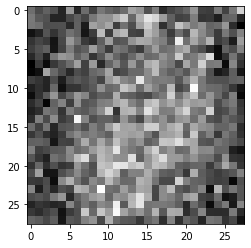

Number batches 78
3(0/78) D: 0.5316, G: 1.1429
3(1/78) D: 0.7416, G: 2.9476
3(2/78) D: 0.4018, G: 2.4742
3(3/78) D: 0.4642, G: 1.4366
3(4/78) D: 0.4028, G: 2.6347
3(5/78) D: 0.4425, G: 1.3093
3(6/78) D: 0.4624, G: 3.1041
3(7/78) D: 0.4278, G: 1.6619
3(8/78) D: 0.3889, G: 2.6141
3(9/78) D: 0.4839, G: 1.0980
3(10/78) D: 0.5369, G: 2.8312
3(11/78) D: 0.5115, G: 0.8544
3(12/78) D: 0.4645, G: 1.6773
3(13/78) D: 0.2986, G: 2.6661
3(14/78) D: 0.3821, G: 1.1228
3(15/78) D: 0.4031, G: 1.9198
3(16/78) D: 0.3267, G: 2.4095
3(17/78) D: 0.3190, G: 1.5057
3(18/78) D: 0.3521, G: 2.1205
3(19/78) D: 0.3257, G: 1.5443
3(20/78) D: 0.3208, G: 2.7990
3(21/78) D: 0.4139, G: 1.1425
3(22/78) D: 0.3867, G: 2.2743
3(23/78) D: 0.3886, G: 1.5515
3(24/78) D: 0.3092, G: 2.2184
3(25/78) D: 0.2645, G: 2.1611
3(26/78) D: 0.2565, G: 2.0206
3(27/78) D: 0.2985, G: 2.1768
3(28/78) D: 0.2915, G: 2.0054
3(29/78) D: 0.2833, G: 2.4084
3(30/78) D: 0.3818, G: 1.6888
3(31/78) D: 0.3383, G: 3.5267
3(32/78) D: 0.5268, G: 0.7592
3(

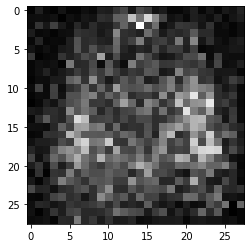

Number batches 78
4(0/78) D: 0.2824, G: 1.5289
4(1/78) D: 0.4139, G: 5.9584
4(2/78) D: 0.7279, G: 1.9418
4(3/78) D: 0.2390, G: 1.6516
4(4/78) D: 0.2667, G: 3.4297
4(5/78) D: 0.2473, G: 2.7662
4(6/78) D: 0.2621, G: 1.6207
4(7/78) D: 0.3145, G: 3.1145
4(8/78) D: 0.3071, G: 2.1526
4(9/78) D: 0.2413, G: 2.0313
4(10/78) D: 0.2886, G: 2.5993
4(11/78) D: 0.2681, G: 2.2688
4(12/78) D: 0.2691, G: 2.2858
4(13/78) D: 0.2361, G: 3.0989
4(14/78) D: 0.2840, G: 1.9941
4(15/78) D: 0.2411, G: 2.1658
4(16/78) D: 0.2368, G: 2.8933
4(17/78) D: 0.1936, G: 2.5415
4(18/78) D: 0.2302, G: 2.6902
4(19/78) D: 0.2089, G: 3.5909
4(20/78) D: 0.2909, G: 3.5003
4(21/78) D: 0.2773, G: 2.2729
4(22/78) D: 0.4185, G: 4.3081
4(23/78) D: 0.5480, G: 1.3148
4(24/78) D: 0.6953, G: 4.6437
4(25/78) D: 0.4701, G: 2.3282
4(26/78) D: 0.3835, G: 1.7805
4(27/78) D: 0.5330, G: 3.0341
4(28/78) D: 0.4824, G: 2.0892
4(29/78) D: 0.4012, G: 2.2500
4(30/78) D: 0.4475, G: 1.9865
4(31/78) D: 0.4163, G: 2.4265
4(32/78) D: 0.3468, G: 2.4437
4(

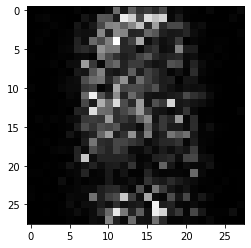

Number batches 78
5(0/78) D: 0.2933, G: 2.5245
5(1/78) D: 0.2075, G: 2.9235
5(2/78) D: 0.2506, G: 2.0422
5(3/78) D: 0.2246, G: 2.1061
5(4/78) D: 0.2238, G: 2.5490
5(5/78) D: 0.2209, G: 2.4821
5(6/78) D: 0.2449, G: 2.0041
5(7/78) D: 0.2794, G: 2.1634
5(8/78) D: 0.2577, G: 2.3870
5(9/78) D: 0.2728, G: 2.2045
5(10/78) D: 0.2886, G: 2.5577
5(11/78) D: 0.4087, G: 1.0662
5(12/78) D: 0.6068, G: 5.3233
5(13/78) D: 0.7688, G: 2.9968
5(14/78) D: 0.4707, G: 0.9996
5(15/78) D: 0.5347, G: 1.8539
5(16/78) D: 0.2955, G: 2.7937
5(17/78) D: 0.2361, G: 2.6061
5(18/78) D: 0.2681, G: 1.9122
5(19/78) D: 0.2856, G: 1.7310
5(20/78) D: 0.3097, G: 2.1924
5(21/78) D: 0.3538, G: 2.2554
5(22/78) D: 0.3650, G: 2.0997
5(23/78) D: 0.3820, G: 1.9039
5(24/78) D: 0.3508, G: 2.0660
5(25/78) D: 0.3323, G: 2.1356
5(26/78) D: 0.3631, G: 1.8470
5(27/78) D: 0.3592, G: 1.6797
5(28/78) D: 0.4513, G: 2.8196
5(29/78) D: 0.4227, G: 1.6496
5(30/78) D: 0.3415, G: 2.0435
5(31/78) D: 0.3846, G: 2.0371
5(32/78) D: 0.4441, G: 1.4900
5(

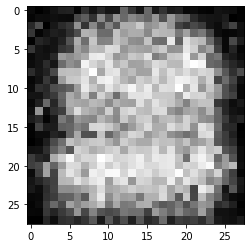

Number batches 78
6(0/78) D: 0.5366, G: 1.9209
6(1/78) D: 0.4451, G: 1.6984
6(2/78) D: 0.4381, G: 2.1590
6(3/78) D: 0.4492, G: 1.8097
6(4/78) D: 0.4096, G: 1.7714
6(5/78) D: 0.3758, G: 1.7890
6(6/78) D: 0.3871, G: 1.9395
6(7/78) D: 0.4601, G: 1.8629
6(8/78) D: 0.4503, G: 1.7553
6(9/78) D: 0.4321, G: 1.6140
6(10/78) D: 0.4053, G: 2.6259
6(11/78) D: 0.4539, G: 1.0078
6(12/78) D: 0.5521, G: 3.8141
6(13/78) D: 0.6216, G: 2.2353
6(14/78) D: 0.3778, G: 1.2056
6(15/78) D: 0.4144, G: 2.1421
6(16/78) D: 0.3180, G: 2.3936
6(17/78) D: 0.3211, G: 2.4517
6(18/78) D: 0.3483, G: 1.7657
6(19/78) D: 0.3564, G: 2.0007
6(20/78) D: 0.3208, G: 2.5758
6(21/78) D: 0.3978, G: 1.2622
6(22/78) D: 0.4230, G: 2.8246
6(23/78) D: 0.3645, G: 1.9258
6(24/78) D: 0.3693, G: 1.8072
6(25/78) D: 0.3243, G: 3.1236
6(26/78) D: 0.4031, G: 1.3663
6(27/78) D: 0.4293, G: 2.8493
6(28/78) D: 0.3559, G: 1.8440
6(29/78) D: 0.3459, G: 2.0012
6(30/78) D: 0.3272, G: 2.4408
6(31/78) D: 0.3782, G: 1.7818
6(32/78) D: 0.4054, G: 2.1794
6(

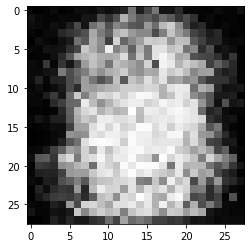

Number batches 78
7(0/78) D: 0.4868, G: 1.3452
7(1/78) D: 0.5035, G: 3.7939
7(2/78) D: 0.6672, G: 1.2737
7(3/78) D: 0.3891, G: 1.8890
7(4/78) D: 0.3057, G: 2.6560
7(5/78) D: 0.3503, G: 2.0010
7(6/78) D: 0.3283, G: 1.6785
7(7/78) D: 0.3288, G: 2.2115
7(8/78) D: 0.2830, G: 2.3837
7(9/78) D: 0.3433, G: 1.7742
7(10/78) D: 0.3393, G: 2.6034
7(11/78) D: 0.3817, G: 1.6719
7(12/78) D: 0.3963, G: 3.3460
7(13/78) D: 0.4191, G: 1.9495
7(14/78) D: 0.3305, G: 1.2685
7(15/78) D: 0.4763, G: 4.2251
7(16/78) D: 0.6415, G: 1.6583
7(17/78) D: 0.3380, G: 2.1167
7(18/78) D: 0.3471, G: 1.9856
7(19/78) D: 0.3247, G: 1.8727
7(20/78) D: 0.3591, G: 2.6402
7(21/78) D: 0.3306, G: 1.9713
7(22/78) D: 0.3258, G: 1.8156
7(23/78) D: 0.3994, G: 2.4240
7(24/78) D: 0.3786, G: 1.6927
7(25/78) D: 0.3869, G: 3.0567
7(26/78) D: 0.3920, G: 1.7158
7(27/78) D: 0.4941, G: 2.0885
7(28/78) D: 0.3662, G: 2.4448
7(29/78) D: 0.3787, G: 1.9639
7(30/78) D: 0.3387, G: 2.4787
7(31/78) D: 0.3542, G: 1.9244
7(32/78) D: 0.4205, G: 2.7972
7(

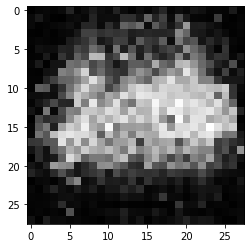

Number batches 78
8(0/78) D: 0.5730, G: 2.5914
8(1/78) D: 0.5609, G: 1.2276
8(2/78) D: 0.4730, G: 1.6801
8(3/78) D: 0.4671, G: 2.0255
8(4/78) D: 0.4186, G: 1.5045
8(5/78) D: 0.4481, G: 1.3673
8(6/78) D: 0.4585, G: 2.0511
8(7/78) D: 0.4341, G: 1.7005
8(8/78) D: 0.4109, G: 1.3615
8(9/78) D: 0.4375, G: 1.7415
8(10/78) D: 0.4207, G: 1.6362
8(11/78) D: 0.5370, G: 1.5598
8(12/78) D: 0.4480, G: 1.9885
8(13/78) D: 0.5182, G: 1.3208
8(14/78) D: 0.5559, G: 2.0735
8(15/78) D: 0.4744, G: 1.8198
8(16/78) D: 0.4619, G: 1.1368
8(17/78) D: 0.4945, G: 2.7700
8(18/78) D: 0.6488, G: 0.9756
8(19/78) D: 0.5924, G: 2.1312
8(20/78) D: 0.4574, G: 1.5044
8(21/78) D: 0.4819, G: 1.3873
8(22/78) D: 0.4166, G: 1.7081
8(23/78) D: 0.5251, G: 1.5883
8(24/78) D: 0.4852, G: 1.7506
8(25/78) D: 0.4434, G: 1.7501
8(26/78) D: 0.4630, G: 1.3307
8(27/78) D: 0.4518, G: 2.1058
8(28/78) D: 0.5139, G: 1.2639
8(29/78) D: 0.5073, G: 2.4274
8(30/78) D: 0.5830, G: 0.8524
8(31/78) D: 0.6470, G: 2.9375
8(32/78) D: 0.6667, G: 1.0407
8(

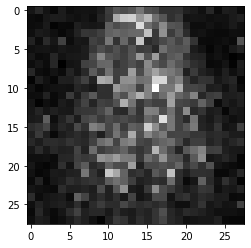

Number batches 78
9(0/78) D: 0.4046, G: 1.3727
9(1/78) D: 0.4229, G: 2.2089
9(2/78) D: 0.4532, G: 1.1512
9(3/78) D: 0.4988, G: 2.3243
9(4/78) D: 0.4929, G: 1.2471
9(5/78) D: 0.4333, G: 1.5012
9(6/78) D: 0.4513, G: 1.4845
9(7/78) D: 0.4864, G: 1.6913
9(8/78) D: 0.3792, G: 1.7957
9(9/78) D: 0.4514, G: 1.0988
9(10/78) D: 0.4830, G: 2.9092
9(11/78) D: 0.7291, G: 1.0257
9(12/78) D: 0.4614, G: 1.8866
9(13/78) D: 0.4084, G: 1.8070
9(14/78) D: 0.3779, G: 1.4714
9(15/78) D: 0.3294, G: 2.0674
9(16/78) D: 0.3678, G: 1.6030
9(17/78) D: 0.3619, G: 2.1720
9(18/78) D: 0.3666, G: 1.4706
9(19/78) D: 0.3700, G: 2.2526
9(20/78) D: 0.3632, G: 1.7046
9(21/78) D: 0.3934, G: 2.4595
9(22/78) D: 0.4322, G: 1.2375
9(23/78) D: 0.4988, G: 3.1000
9(24/78) D: 0.5431, G: 1.1126
9(25/78) D: 0.4729, G: 2.5087
9(26/78) D: 0.4262, G: 1.6136
9(27/78) D: 0.3934, G: 1.3718
9(28/78) D: 0.3907, G: 2.3086
9(29/78) D: 0.4250, G: 1.2632
9(30/78) D: 0.4020, G: 2.0111
9(31/78) D: 0.4265, G: 1.6630
9(32/78) D: 0.4260, G: 1.4918
9(

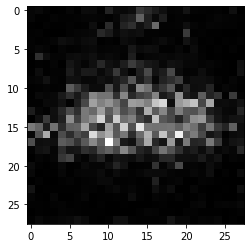

Number batches 78
10(0/78) D: 0.5274, G: 2.4424
10(1/78) D: 0.4804, G: 1.3985
10(2/78) D: 0.4749, G: 1.9892
10(3/78) D: 0.4591, G: 1.4194
10(4/78) D: 0.4657, G: 1.9410
10(5/78) D: 0.4367, G: 1.7075
10(6/78) D: 0.4514, G: 1.5018
10(7/78) D: 0.4417, G: 1.9698
10(8/78) D: 0.4368, G: 1.8448
10(9/78) D: 0.4501, G: 2.1605
10(10/78) D: 0.4489, G: 0.8916
10(11/78) D: 0.6616, G: 3.3966
10(12/78) D: 0.6972, G: 1.1305
10(13/78) D: 0.4935, G: 1.4593
10(14/78) D: 0.4526, G: 2.2089
10(15/78) D: 0.4097, G: 1.5627
10(16/78) D: 0.4699, G: 1.4331
10(17/78) D: 0.3957, G: 2.0492
10(18/78) D: 0.4363, G: 1.2414
10(19/78) D: 0.3936, G: 1.7336
10(20/78) D: 0.3649, G: 2.0822
10(21/78) D: 0.4339, G: 1.6758
10(22/78) D: 0.4492, G: 1.8207
10(23/78) D: 0.4087, G: 1.5746
10(24/78) D: 0.4000, G: 2.3634
10(25/78) D: 0.3983, G: 1.1640
10(26/78) D: 0.4860, G: 3.1299
10(27/78) D: 0.5460, G: 1.0490
10(28/78) D: 0.4773, G: 2.4845
10(29/78) D: 0.4253, G: 1.8924
10(30/78) D: 0.4091, G: 1.6084
10(31/78) D: 0.3981, G: 1.7656


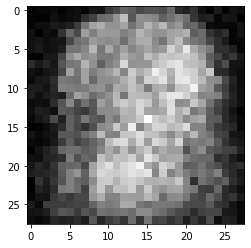

Number batches 78
11(0/78) D: 0.4076, G: 1.6001
11(1/78) D: 0.3633, G: 2.3001
11(2/78) D: 0.4088, G: 1.7602
11(3/78) D: 0.3737, G: 2.3811
11(4/78) D: 0.3948, G: 1.9618
11(5/78) D: 0.4063, G: 1.4477
11(6/78) D: 0.3834, G: 1.9503
11(7/78) D: 0.3882, G: 2.8035
11(8/78) D: 0.4532, G: 0.9441
11(9/78) D: 0.5899, G: 3.2377
11(10/78) D: 0.6725, G: 1.3956
11(11/78) D: 0.5070, G: 1.6806
11(12/78) D: 0.3798, G: 2.1560
11(13/78) D: 0.4633, G: 1.3812
11(14/78) D: 0.4588, G: 1.7953
11(15/78) D: 0.3719, G: 1.8264
11(16/78) D: 0.4755, G: 1.4677
11(17/78) D: 0.3289, G: 1.9794
11(18/78) D: 0.3845, G: 1.6592
11(19/78) D: 0.3772, G: 1.6906
11(20/78) D: 0.3620, G: 2.2450
11(21/78) D: 0.3963, G: 1.4534
11(22/78) D: 0.4139, G: 2.0863
11(23/78) D: 0.3826, G: 1.7967
11(24/78) D: 0.3788, G: 2.1667
11(25/78) D: 0.3047, G: 2.4029
11(26/78) D: 0.3552, G: 1.4616
11(27/78) D: 0.3878, G: 2.1374
11(28/78) D: 0.3699, G: 1.7704
11(29/78) D: 0.3535, G: 1.7500
11(30/78) D: 0.4705, G: 2.9477
11(31/78) D: 0.4786, G: 0.7293


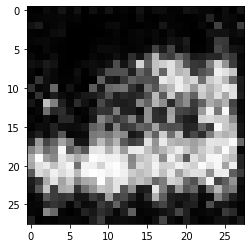

Number batches 78
12(0/78) D: 0.3807, G: 1.7809
12(1/78) D: 0.4253, G: 1.5540
12(2/78) D: 0.3867, G: 1.9513
12(3/78) D: 0.3644, G: 1.2811
12(4/78) D: 0.4171, G: 2.4039
12(5/78) D: 0.4262, G: 1.4367
12(6/78) D: 0.4317, G: 1.6306
12(7/78) D: 0.4254, G: 1.8211
12(8/78) D: 0.4100, G: 2.1530
12(9/78) D: 0.4477, G: 1.2409
12(10/78) D: 0.3777, G: 2.2936
12(11/78) D: 0.4851, G: 1.0302
12(12/78) D: 0.4522, G: 2.7415
12(13/78) D: 0.4527, G: 1.4595
12(14/78) D: 0.4827, G: 1.8249
12(15/78) D: 0.3895, G: 2.0516
12(16/78) D: 0.4281, G: 1.3773
12(17/78) D: 0.3768, G: 2.0548
12(18/78) D: 0.4752, G: 1.1718
12(19/78) D: 0.5241, G: 2.1295
12(20/78) D: 0.4610, G: 1.7304
12(21/78) D: 0.4430, G: 1.3748
12(22/78) D: 0.4379, G: 2.0182
12(23/78) D: 0.4451, G: 1.5890
12(24/78) D: 0.4767, G: 2.0935
12(25/78) D: 0.5340, G: 1.1720
12(26/78) D: 0.4029, G: 2.1685
12(27/78) D: 0.5168, G: 1.7148
12(28/78) D: 0.4191, G: 2.1456
12(29/78) D: 0.3984, G: 1.6132
12(30/78) D: 0.4031, G: 2.1088
12(31/78) D: 0.5374, G: 1.6161


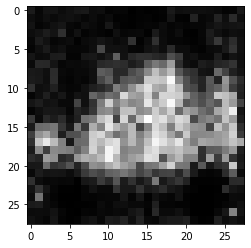

Number batches 78
13(0/78) D: 0.5003, G: 1.3015
13(1/78) D: 0.4591, G: 2.4502
13(2/78) D: 0.4877, G: 1.7213
13(3/78) D: 0.4248, G: 1.3588
13(4/78) D: 0.4692, G: 2.5300
13(5/78) D: 0.5649, G: 0.9980
13(6/78) D: 0.6177, G: 2.5539
13(7/78) D: 0.6697, G: 0.9506
13(8/78) D: 0.5695, G: 1.7944
13(9/78) D: 0.5707, G: 1.3696
13(10/78) D: 0.4999, G: 1.4472
13(11/78) D: 0.5494, G: 1.5335
13(12/78) D: 0.4751, G: 1.6006
13(13/78) D: 0.4461, G: 1.4078
13(14/78) D: 0.5453, G: 1.9345
13(15/78) D: 0.4872, G: 1.1901
13(16/78) D: 0.4798, G: 1.9397
13(17/78) D: 0.5018, G: 1.8423
13(18/78) D: 0.5369, G: 0.8194
13(19/78) D: 0.6189, G: 2.7370
13(20/78) D: 0.5745, G: 1.3376
13(21/78) D: 0.4464, G: 1.2825
13(22/78) D: 0.5419, G: 1.7704
13(23/78) D: 0.4736, G: 1.5598
13(24/78) D: 0.4588, G: 1.7120
13(25/78) D: 0.3916, G: 1.6483
13(26/78) D: 0.3586, G: 1.5594
13(27/78) D: 0.4481, G: 1.3960
13(28/78) D: 0.4200, G: 1.9011
13(29/78) D: 0.3863, G: 1.5842
13(30/78) D: 0.4052, G: 1.8277
13(31/78) D: 0.4221, G: 1.7100


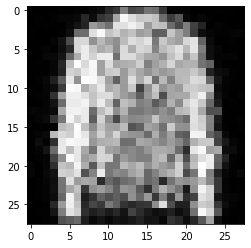

Number batches 78
14(0/78) D: 0.4486, G: 1.4782
14(1/78) D: 0.4525, G: 2.0955
14(2/78) D: 0.4894, G: 0.9396
14(3/78) D: 0.4758, G: 2.8202
14(4/78) D: 0.6371, G: 1.1587
14(5/78) D: 0.4871, G: 1.8160
14(6/78) D: 0.4121, G: 1.7984
14(7/78) D: 0.4545, G: 1.4948
14(8/78) D: 0.4035, G: 2.0077
14(9/78) D: 0.3977, G: 1.3940
14(10/78) D: 0.4023, G: 1.8195
14(11/78) D: 0.4521, G: 1.4558
14(12/78) D: 0.4073, G: 2.4372
14(13/78) D: 0.4387, G: 1.6148
14(14/78) D: 0.3992, G: 1.8643
14(15/78) D: 0.3589, G: 1.8973
14(16/78) D: 0.4001, G: 1.6276
14(17/78) D: 0.3793, G: 2.7794
14(18/78) D: 0.5429, G: 0.7522
14(19/78) D: 0.7007, G: 3.8493
14(20/78) D: 0.8731, G: 1.8563
14(21/78) D: 0.3940, G: 0.8868
14(22/78) D: 0.4977, G: 1.6880
14(23/78) D: 0.3685, G: 1.7818
14(24/78) D: 0.3863, G: 1.5598
14(25/78) D: 0.3282, G: 1.7548
14(26/78) D: 0.3366, G: 1.6861
14(27/78) D: 0.3900, G: 1.7984
14(28/78) D: 0.3760, G: 1.7988
14(29/78) D: 0.3684, G: 1.7514
14(30/78) D: 0.4158, G: 2.0425
14(31/78) D: 0.3959, G: 1.4722


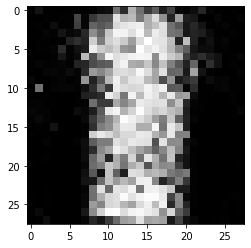

Number batches 78
15(0/78) D: 0.4366, G: 1.6623
15(1/78) D: 0.4110, G: 2.1162
15(2/78) D: 0.4662, G: 1.1047
15(3/78) D: 0.4441, G: 2.6781
15(4/78) D: 0.4967, G: 1.5210
15(5/78) D: 0.4264, G: 1.4809
15(6/78) D: 0.4602, G: 1.8734
15(7/78) D: 0.4244, G: 1.5795
15(8/78) D: 0.4142, G: 2.2961
15(9/78) D: 0.4759, G: 1.0746
15(10/78) D: 0.5071, G: 2.2686
15(11/78) D: 0.5033, G: 1.4302
15(12/78) D: 0.4989, G: 2.1981
15(13/78) D: 0.4715, G: 1.3915
15(14/78) D: 0.4499, G: 1.8974
15(15/78) D: 0.4309, G: 1.8335
15(16/78) D: 0.5108, G: 1.2872
15(17/78) D: 0.4477, G: 2.5038
15(18/78) D: 0.5899, G: 1.0270
15(19/78) D: 0.6095, G: 2.3940
15(20/78) D: 0.5343, G: 1.4442
15(21/78) D: 0.4082, G: 1.2376
15(22/78) D: 0.5279, G: 2.0339
15(23/78) D: 0.4854, G: 1.2535
15(24/78) D: 0.5033, G: 1.8873
15(25/78) D: 0.4917, G: 1.6044
15(26/78) D: 0.4062, G: 1.6283
15(27/78) D: 0.4257, G: 1.6199
15(28/78) D: 0.4293, G: 1.8130
15(29/78) D: 0.4478, G: 1.6793
15(30/78) D: 0.4470, G: 1.2853
15(31/78) D: 0.4743, G: 2.1260


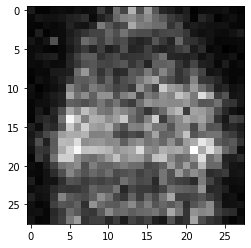

Number batches 78
16(0/78) D: 0.4240, G: 1.4414
16(1/78) D: 0.4072, G: 2.4985
16(2/78) D: 0.3702, G: 1.3305
16(3/78) D: 0.4095, G: 2.5532
16(4/78) D: 0.4081, G: 1.7086
16(5/78) D: 0.3409, G: 1.8683
16(6/78) D: 0.3596, G: 1.8068
16(7/78) D: 0.3669, G: 1.9642
16(8/78) D: 0.3480, G: 1.9039
16(9/78) D: 0.4465, G: 1.7258
16(10/78) D: 0.4250, G: 2.4330
16(11/78) D: 0.4798, G: 1.0616
16(12/78) D: 0.5148, G: 3.1585
16(13/78) D: 0.6038, G: 1.1027
16(14/78) D: 0.4999, G: 1.3958
16(15/78) D: 0.4084, G: 2.3671
16(16/78) D: 0.4591, G: 1.5537
16(17/78) D: 0.3609, G: 1.9244
16(18/78) D: 0.4553, G: 1.6275
16(19/78) D: 0.4259, G: 1.5622
16(20/78) D: 0.4084, G: 2.2362
16(21/78) D: 0.4493, G: 1.6180
16(22/78) D: 0.4874, G: 1.8165
16(23/78) D: 0.4601, G: 1.5044
16(24/78) D: 0.4227, G: 2.2156
16(25/78) D: 0.4090, G: 1.7719
16(26/78) D: 0.4023, G: 1.8421
16(27/78) D: 0.4612, G: 1.5290
16(28/78) D: 0.4545, G: 2.3065
16(29/78) D: 0.4403, G: 1.3924
16(30/78) D: 0.4764, G: 2.1259
16(31/78) D: 0.4069, G: 1.6542


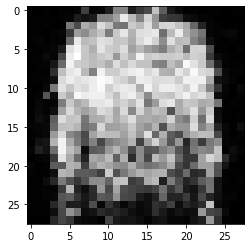

Number batches 78
17(0/78) D: 0.3975, G: 1.1214
17(1/78) D: 0.4283, G: 2.8606
17(2/78) D: 0.4662, G: 1.2650
17(3/78) D: 0.3985, G: 2.3278
17(4/78) D: 0.2880, G: 2.1581
17(5/78) D: 0.3008, G: 1.8720
17(6/78) D: 0.3684, G: 1.8500
17(7/78) D: 0.3804, G: 1.8840
17(8/78) D: 0.4061, G: 1.9061
17(9/78) D: 0.4334, G: 1.9144
17(10/78) D: 0.4122, G: 1.5568
17(11/78) D: 0.5218, G: 2.1724
17(12/78) D: 0.4745, G: 1.7157
17(13/78) D: 0.5309, G: 1.8841
17(14/78) D: 0.4573, G: 1.4847
17(15/78) D: 0.4494, G: 2.6520
17(16/78) D: 0.4722, G: 1.0968
17(17/78) D: 0.5621, G: 3.3492
17(18/78) D: 0.7768, G: 0.8743
17(19/78) D: 0.5999, G: 2.0779
17(20/78) D: 0.4027, G: 1.9624
17(21/78) D: 0.4583, G: 1.4247
17(22/78) D: 0.4344, G: 1.6190
17(23/78) D: 0.4542, G: 1.7709
17(24/78) D: 0.4748, G: 1.6134
17(25/78) D: 0.4415, G: 1.8116
17(26/78) D: 0.3885, G: 1.9979
17(27/78) D: 0.4789, G: 1.1135
17(28/78) D: 0.5045, G: 2.6438
17(29/78) D: 0.5488, G: 1.4430
17(30/78) D: 0.4189, G: 1.8276
17(31/78) D: 0.4118, G: 1.8882


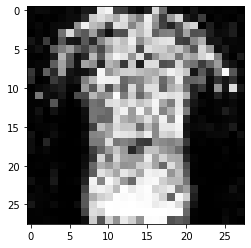

Number batches 78
18(0/78) D: 0.3885, G: 1.8231
18(1/78) D: 0.4089, G: 1.6204
18(2/78) D: 0.4274, G: 1.7570
18(3/78) D: 0.4464, G: 1.9162
18(4/78) D: 0.4866, G: 1.4512
18(5/78) D: 0.4867, G: 2.9170
18(6/78) D: 0.6589, G: 0.6867
18(7/78) D: 0.6571, G: 3.0330
18(8/78) D: 0.5965, G: 1.5797
18(9/78) D: 0.4788, G: 1.2132
18(10/78) D: 0.4282, G: 2.0075
18(11/78) D: 0.4742, G: 1.4035
18(12/78) D: 0.3930, G: 1.6039
18(13/78) D: 0.3687, G: 2.0535
18(14/78) D: 0.4029, G: 1.5855
18(15/78) D: 0.4875, G: 1.7122
18(16/78) D: 0.4181, G: 1.7098
18(17/78) D: 0.3756, G: 2.2611
18(18/78) D: 0.4129, G: 1.3820
18(19/78) D: 0.4447, G: 1.8577
18(20/78) D: 0.4360, G: 1.3908
18(21/78) D: 0.4770, G: 2.2328
18(22/78) D: 0.4915, G: 1.0563
18(23/78) D: 0.5118, G: 2.6368
18(24/78) D: 0.4689, G: 1.3642
18(25/78) D: 0.4108, G: 1.5604
18(26/78) D: 0.3974, G: 2.0292
18(27/78) D: 0.4154, G: 1.4061
18(28/78) D: 0.4209, G: 2.1993
18(29/78) D: 0.4213, G: 1.6308
18(30/78) D: 0.3789, G: 1.8197
18(31/78) D: 0.3676, G: 1.9013


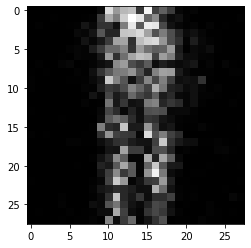

Number batches 78
19(0/78) D: 0.4783, G: 2.0025
19(1/78) D: 0.4472, G: 1.5438
19(2/78) D: 0.4143, G: 1.2403
19(3/78) D: 0.4134, G: 1.8696
19(4/78) D: 0.3739, G: 1.8093
19(5/78) D: 0.3682, G: 1.5484
19(6/78) D: 0.4048, G: 1.7913
19(7/78) D: 0.4232, G: 1.7178
19(8/78) D: 0.4085, G: 1.4348
19(9/78) D: 0.4439, G: 2.0285
19(10/78) D: 0.5202, G: 1.4560
19(11/78) D: 0.5192, G: 1.7631
19(12/78) D: 0.4759, G: 1.7379
19(13/78) D: 0.4621, G: 1.5008
19(14/78) D: 0.4582, G: 1.7970
19(15/78) D: 0.4341, G: 1.7157
19(16/78) D: 0.4845, G: 1.0305
19(17/78) D: 0.4637, G: 2.5622
19(18/78) D: 0.6018, G: 0.9266
19(19/78) D: 0.6029, G: 2.4523
19(20/78) D: 0.5240, G: 1.5796
19(21/78) D: 0.4693, G: 1.2381
19(22/78) D: 0.5115, G: 1.9226
19(23/78) D: 0.4692, G: 1.7499
19(24/78) D: 0.4490, G: 1.9252
19(25/78) D: 0.4161, G: 1.5223
19(26/78) D: 0.4546, G: 1.4973
19(27/78) D: 0.5151, G: 1.9519
19(28/78) D: 0.3896, G: 1.9098
19(29/78) D: 0.4157, G: 1.6346
19(30/78) D: 0.4737, G: 1.8441
19(31/78) D: 0.4633, G: 1.6023


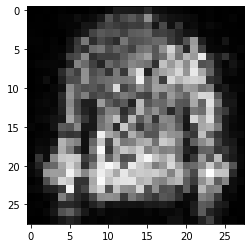

Number batches 78
20(0/78) D: 0.6270, G: 1.0944
20(1/78) D: 0.4791, G: 1.7797
20(2/78) D: 0.5030, G: 1.7468
20(3/78) D: 0.3959, G: 1.6007
20(4/78) D: 0.3629, G: 1.9896
20(5/78) D: 0.3873, G: 1.7548
20(6/78) D: 0.5245, G: 1.2153
20(7/78) D: 0.4863, G: 2.6560
20(8/78) D: 0.5333, G: 1.1322
20(9/78) D: 0.4854, G: 2.5513
20(10/78) D: 0.5399, G: 1.3073
20(11/78) D: 0.5220, G: 1.4957
20(12/78) D: 0.4534, G: 2.7372
20(13/78) D: 0.5798, G: 1.0083
20(14/78) D: 0.5322, G: 1.9302
20(15/78) D: 0.4509, G: 1.8124
20(16/78) D: 0.4670, G: 1.3761
20(17/78) D: 0.4551, G: 1.7920
20(18/78) D: 0.4205, G: 1.4379
20(19/78) D: 0.4673, G: 1.3948
20(20/78) D: 0.5247, G: 2.2995
20(21/78) D: 0.5844, G: 1.1480
20(22/78) D: 0.4718, G: 1.7288
20(23/78) D: 0.4788, G: 1.2900
20(24/78) D: 0.4779, G: 1.8992
20(25/78) D: 0.4696, G: 1.3209
20(26/78) D: 0.4929, G: 1.6381
20(27/78) D: 0.4599, G: 1.6978
20(28/78) D: 0.4712, G: 1.6361
20(29/78) D: 0.4156, G: 1.4705
20(30/78) D: 0.4504, G: 2.1401
20(31/78) D: 0.5286, G: 1.1441


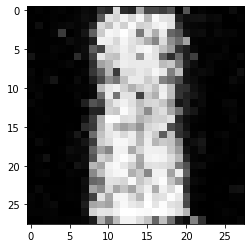

Number batches 78
21(0/78) D: 0.5613, G: 0.8775
21(1/78) D: 0.6104, G: 2.8014
21(2/78) D: 0.5931, G: 1.4103
21(3/78) D: 0.4049, G: 1.2118
21(4/78) D: 0.4235, G: 2.0479
21(5/78) D: 0.4129, G: 1.9159
21(6/78) D: 0.3963, G: 1.1545
21(7/78) D: 0.4450, G: 1.7494
21(8/78) D: 0.4363, G: 2.2020
21(9/78) D: 0.4065, G: 1.1693
21(10/78) D: 0.4835, G: 1.7631
21(11/78) D: 0.4731, G: 1.3993
21(12/78) D: 0.4438, G: 1.9998
21(13/78) D: 0.4493, G: 1.3577
21(14/78) D: 0.4254, G: 1.8558
21(15/78) D: 0.4605, G: 1.6508
21(16/78) D: 0.4350, G: 1.2918
21(17/78) D: 0.4735, G: 2.7089
21(18/78) D: 0.5844, G: 1.0623
21(19/78) D: 0.5112, G: 1.8529
21(20/78) D: 0.4489, G: 1.7806
21(21/78) D: 0.4109, G: 1.2470
21(22/78) D: 0.4636, G: 1.6098
21(23/78) D: 0.4294, G: 1.6343
21(24/78) D: 0.4350, G: 1.7665
21(25/78) D: 0.4230, G: 1.3774
21(26/78) D: 0.4557, G: 1.6063
21(27/78) D: 0.4420, G: 1.8114
21(28/78) D: 0.4102, G: 1.8999
21(29/78) D: 0.4413, G: 1.6028
21(30/78) D: 0.4723, G: 1.7659
21(31/78) D: 0.4851, G: 1.6076


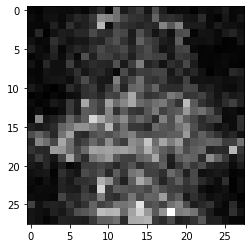

Number batches 78
22(0/78) D: 0.5601, G: 1.3398
22(1/78) D: 0.5111, G: 1.8962
22(2/78) D: 0.4380, G: 1.6879
22(3/78) D: 0.3907, G: 1.6704
22(4/78) D: 0.4148, G: 2.1095
22(5/78) D: 0.4034, G: 1.6436
22(6/78) D: 0.3967, G: 1.9030
22(7/78) D: 0.3986, G: 2.0987
22(8/78) D: 0.4153, G: 1.4353
22(9/78) D: 0.4794, G: 1.9786
22(10/78) D: 0.4535, G: 1.8530
22(11/78) D: 0.4105, G: 1.5889
22(12/78) D: 0.4703, G: 2.2155
22(13/78) D: 0.4189, G: 1.7024
22(14/78) D: 0.4812, G: 1.8670
22(15/78) D: 0.4330, G: 1.8636
22(16/78) D: 0.4337, G: 1.8146
22(17/78) D: 0.3715, G: 2.5328
22(18/78) D: 0.5074, G: 0.8216
22(19/78) D: 0.6051, G: 3.1414
22(20/78) D: 0.5331, G: 1.4655
22(21/78) D: 0.3867, G: 1.3680
22(22/78) D: 0.3886, G: 2.2216
22(23/78) D: 0.4060, G: 1.5963
22(24/78) D: 0.4020, G: 1.6738
22(25/78) D: 0.3382, G: 1.5300
22(26/78) D: 0.3983, G: 1.8403
22(27/78) D: 0.4201, G: 1.9485
22(28/78) D: 0.3661, G: 2.0715
22(29/78) D: 0.4175, G: 1.9516
22(30/78) D: 0.4073, G: 1.6074
22(31/78) D: 0.4730, G: 2.1864


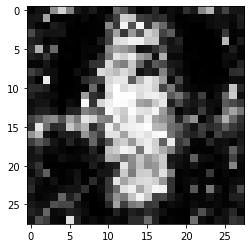

Number batches 78
23(0/78) D: 0.4136, G: 1.9818
23(1/78) D: 0.3486, G: 2.0749
23(2/78) D: 0.3949, G: 1.2516
23(3/78) D: 0.4314, G: 2.5596
23(4/78) D: 0.4260, G: 1.4329
23(5/78) D: 0.4469, G: 2.0891
23(6/78) D: 0.4321, G: 1.5053
23(7/78) D: 0.4207, G: 2.0319
23(8/78) D: 0.4301, G: 1.7005
23(9/78) D: 0.4207, G: 1.6550
23(10/78) D: 0.4375, G: 2.4452
23(11/78) D: 0.4304, G: 1.5268
23(12/78) D: 0.4245, G: 2.3529
23(13/78) D: 0.4634, G: 1.1096
23(14/78) D: 0.5671, G: 2.4228
23(15/78) D: 0.4690, G: 1.4899
23(16/78) D: 0.4598, G: 2.2125
23(17/78) D: 0.3827, G: 1.6187
23(18/78) D: 0.4524, G: 1.9657
23(19/78) D: 0.4633, G: 1.7009
23(20/78) D: 0.5066, G: 2.2120
23(21/78) D: 0.4124, G: 1.6110
23(22/78) D: 0.4745, G: 1.7535
23(23/78) D: 0.4329, G: 1.9697
23(24/78) D: 0.4914, G: 1.6943
23(25/78) D: 0.4614, G: 1.3872
23(26/78) D: 0.4671, G: 2.1053
23(27/78) D: 0.5161, G: 1.2003
23(28/78) D: 0.5290, G: 2.3243
23(29/78) D: 0.4597, G: 1.4292
23(30/78) D: 0.4995, G: 2.0728
23(31/78) D: 0.4021, G: 1.5965


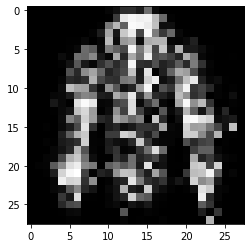

Number batches 78
24(0/78) D: 0.4825, G: 1.4399
24(1/78) D: 0.4368, G: 2.1942
24(2/78) D: 0.4646, G: 0.9479
24(3/78) D: 0.5078, G: 3.1218
24(4/78) D: 0.6317, G: 1.0879
24(5/78) D: 0.4473, G: 1.6122
24(6/78) D: 0.4629, G: 2.1660
24(7/78) D: 0.4651, G: 1.5890
24(8/78) D: 0.4320, G: 1.5328
24(9/78) D: 0.4401, G: 1.8872
24(10/78) D: 0.3818, G: 1.5268
24(11/78) D: 0.4155, G: 1.9556
24(12/78) D: 0.4032, G: 1.7094
24(13/78) D: 0.4266, G: 1.5665
24(14/78) D: 0.4331, G: 2.1054
24(15/78) D: 0.4370, G: 1.6197
24(16/78) D: 0.4134, G: 1.7882
24(17/78) D: 0.4161, G: 2.0693
24(18/78) D: 0.4625, G: 0.8951
24(19/78) D: 0.6078, G: 3.2010
24(20/78) D: 0.6373, G: 1.6502
24(21/78) D: 0.4364, G: 0.9554
24(22/78) D: 0.4882, G: 2.0774
24(23/78) D: 0.4654, G: 1.6709
24(24/78) D: 0.3988, G: 1.3124
24(25/78) D: 0.4167, G: 1.5762
24(26/78) D: 0.4181, G: 1.8193
24(27/78) D: 0.4123, G: 1.4687
24(28/78) D: 0.4241, G: 2.1059
24(29/78) D: 0.3808, G: 1.5106
24(30/78) D: 0.3738, G: 1.9622
24(31/78) D: 0.4034, G: 1.8763


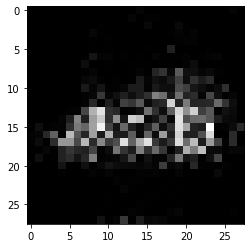

Number batches 78
25(0/78) D: 0.3517, G: 1.9544
25(1/78) D: 0.3743, G: 1.7935
25(2/78) D: 0.3750, G: 2.2245
25(3/78) D: 0.3802, G: 1.8297
25(4/78) D: 0.4090, G: 2.0808
25(5/78) D: 0.3381, G: 1.5455
25(6/78) D: 0.4190, G: 2.1954
25(7/78) D: 0.3888, G: 1.9218
25(8/78) D: 0.4528, G: 2.3729
25(9/78) D: 0.4070, G: 1.7341
25(10/78) D: 0.4180, G: 2.2269
25(11/78) D: 0.4141, G: 1.7058
25(12/78) D: 0.3523, G: 2.2140
25(13/78) D: 0.4470, G: 1.6115
25(14/78) D: 0.4503, G: 2.5781
25(15/78) D: 0.4290, G: 0.9423
25(16/78) D: 0.5421, G: 3.1873
25(17/78) D: 0.5133, G: 1.5042
25(18/78) D: 0.4228, G: 1.5913
25(19/78) D: 0.4434, G: 2.2242
25(20/78) D: 0.3937, G: 1.5416
25(21/78) D: 0.4201, G: 1.7152
25(22/78) D: 0.4119, G: 2.3610
25(23/78) D: 0.4446, G: 1.2085
25(24/78) D: 0.4768, G: 2.4103
25(25/78) D: 0.4679, G: 1.5625
25(26/78) D: 0.4232, G: 1.6110
25(27/78) D: 0.4653, G: 1.4823
25(28/78) D: 0.4649, G: 1.9104
25(29/78) D: 0.3950, G: 1.6227
25(30/78) D: 0.4256, G: 1.7882
25(31/78) D: 0.3957, G: 1.7403


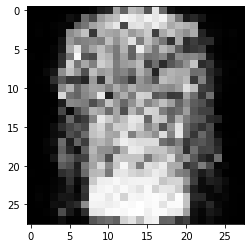

Number batches 78
26(0/78) D: 0.3443, G: 2.2578
26(1/78) D: 0.3334, G: 2.0514
26(2/78) D: 0.3895, G: 1.6703
26(3/78) D: 0.3521, G: 2.5873
26(4/78) D: 0.3819, G: 1.7504
26(5/78) D: 0.3917, G: 2.0329
26(6/78) D: 0.3630, G: 2.1423
26(7/78) D: 0.4376, G: 1.7732
26(8/78) D: 0.4225, G: 2.4985
26(9/78) D: 0.4296, G: 1.4910
26(10/78) D: 0.4580, G: 2.7044
26(11/78) D: 0.5754, G: 1.0924
26(12/78) D: 0.5811, G: 4.1098
26(13/78) D: 0.6493, G: 1.6815
26(14/78) D: 0.3555, G: 1.0614
26(15/78) D: 0.4251, G: 2.5817
26(16/78) D: 0.4353, G: 1.7756
26(17/78) D: 0.3248, G: 1.7325
26(18/78) D: 0.3566, G: 2.3826
26(19/78) D: 0.4279, G: 1.7706
26(20/78) D: 0.3622, G: 2.1438
26(21/78) D: 0.2951, G: 2.2087
26(22/78) D: 0.3904, G: 1.8291
26(23/78) D: 0.3462, G: 2.0132
26(24/78) D: 0.4229, G: 2.5936
26(25/78) D: 0.3811, G: 1.5583
26(26/78) D: 0.3918, G: 2.1347
26(27/78) D: 0.4199, G: 2.0964
26(28/78) D: 0.4908, G: 1.7540
26(29/78) D: 0.3558, G: 2.3746
26(30/78) D: 0.4969, G: 1.5339
26(31/78) D: 0.3700, G: 2.3787


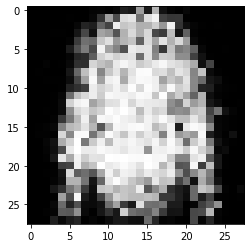

Number batches 78
27(0/78) D: 0.4111, G: 1.7645
27(1/78) D: 0.4119, G: 1.9500
27(2/78) D: 0.4705, G: 1.6161
27(3/78) D: 0.4648, G: 2.0268
27(4/78) D: 0.4163, G: 1.9333
27(5/78) D: 0.3892, G: 2.2543
27(6/78) D: 0.4903, G: 1.2102
27(7/78) D: 0.5936, G: 2.8371
27(8/78) D: 0.5249, G: 1.7273
27(9/78) D: 0.4246, G: 1.5485
27(10/78) D: 0.4691, G: 1.9259
27(11/78) D: 0.4807, G: 1.5745
27(12/78) D: 0.3785, G: 1.9063
27(13/78) D: 0.4450, G: 1.8026
27(14/78) D: 0.4902, G: 1.7399
27(15/78) D: 0.4368, G: 1.9796
27(16/78) D: 0.4910, G: 1.3505
27(17/78) D: 0.5028, G: 3.0948
27(18/78) D: 0.5627, G: 1.2889
27(19/78) D: 0.4728, G: 1.4665
27(20/78) D: 0.4614, G: 2.0414
27(21/78) D: 0.4023, G: 2.1735
27(22/78) D: 0.4673, G: 1.4012
27(23/78) D: 0.4351, G: 1.7336
27(24/78) D: 0.4941, G: 1.9742
27(25/78) D: 0.3765, G: 1.7522
27(26/78) D: 0.4041, G: 1.9209
27(27/78) D: 0.4555, G: 1.7986
27(28/78) D: 0.5010, G: 1.8520
27(29/78) D: 0.4465, G: 1.7652
27(30/78) D: 0.4641, G: 1.9483
27(31/78) D: 0.4390, G: 1.8353


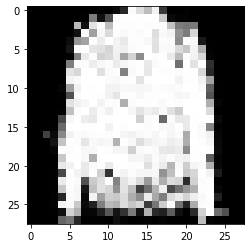

Number batches 78
28(0/78) D: 0.5132, G: 1.7994
28(1/78) D: 0.3839, G: 1.7991
28(2/78) D: 0.3562, G: 1.6293
28(3/78) D: 0.4012, G: 1.9389
28(4/78) D: 0.4317, G: 1.6908
28(5/78) D: 0.4102, G: 1.6842
28(6/78) D: 0.4376, G: 2.1717
28(7/78) D: 0.4279, G: 1.3184
28(8/78) D: 0.4510, G: 2.1176
28(9/78) D: 0.4560, G: 1.4830
28(10/78) D: 0.4405, G: 1.7867
28(11/78) D: 0.4497, G: 1.8736
28(12/78) D: 0.4267, G: 1.6506
28(13/78) D: 0.3978, G: 1.9131
28(14/78) D: 0.4578, G: 1.7904
28(15/78) D: 0.3613, G: 1.6509
28(16/78) D: 0.3855, G: 1.8165
28(17/78) D: 0.3472, G: 2.7703
28(18/78) D: 0.5819, G: 0.9076
28(19/78) D: 0.7129, G: 3.2463
28(20/78) D: 0.6574, G: 2.2537
28(21/78) D: 0.4552, G: 1.0279
28(22/78) D: 0.4484, G: 1.4495
28(23/78) D: 0.4950, G: 2.1057
28(24/78) D: 0.4328, G: 1.5890
28(25/78) D: 0.4163, G: 1.6898
28(26/78) D: 0.4334, G: 1.8501
28(27/78) D: 0.5136, G: 1.4672
28(28/78) D: 0.4565, G: 1.6665
28(29/78) D: 0.4612, G: 2.0743
28(30/78) D: 0.4476, G: 1.6819
28(31/78) D: 0.3771, G: 1.7635


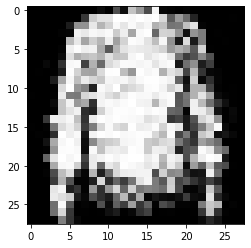

Number batches 78
29(0/78) D: 0.4775, G: 1.6144
29(1/78) D: 0.3655, G: 1.8120
29(2/78) D: 0.3824, G: 1.9039
29(3/78) D: 0.4117, G: 1.7881
29(4/78) D: 0.4540, G: 1.6148
29(5/78) D: 0.4456, G: 2.0544
29(6/78) D: 0.4009, G: 1.4490
29(7/78) D: 0.4719, G: 2.5965
29(8/78) D: 0.4244, G: 1.4673
29(9/78) D: 0.4628, G: 1.8237
29(10/78) D: 0.4014, G: 2.2695
29(11/78) D: 0.4031, G: 0.9912
29(12/78) D: 0.4680, G: 2.7660
29(13/78) D: 0.5806, G: 1.4223
29(14/78) D: 0.5159, G: 1.5451
29(15/78) D: 0.4562, G: 2.4648
29(16/78) D: 0.5166, G: 1.4884
29(17/78) D: 0.3690, G: 2.1309
29(18/78) D: 0.4248, G: 1.7177
29(19/78) D: 0.4309, G: 1.8520
29(20/78) D: 0.4526, G: 2.3803
29(21/78) D: 0.4298, G: 1.6310
29(22/78) D: 0.4220, G: 1.4723
29(23/78) D: 0.4128, G: 1.8304
29(24/78) D: 0.4177, G: 2.3758
29(25/78) D: 0.4503, G: 1.2008
29(26/78) D: 0.4482, G: 2.0404
29(27/78) D: 0.5187, G: 1.6099
29(28/78) D: 0.4293, G: 1.5730
29(29/78) D: 0.3654, G: 2.1351
29(30/78) D: 0.4643, G: 1.6808
29(31/78) D: 0.4023, G: 1.6196


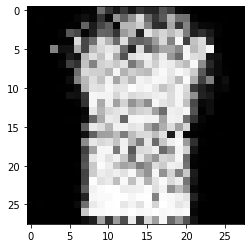

Number batches 78
30(0/78) D: 0.5470, G: 1.3235
30(1/78) D: 0.4304, G: 2.0685
30(2/78) D: 0.4532, G: 1.3376
30(3/78) D: 0.4608, G: 1.9829
30(4/78) D: 0.4271, G: 1.8605
30(5/78) D: 0.3986, G: 2.0561
30(6/78) D: 0.4551, G: 1.6437
30(7/78) D: 0.4686, G: 1.7901
30(8/78) D: 0.4997, G: 1.5944
30(9/78) D: 0.5395, G: 1.6773
30(10/78) D: 0.5315, G: 1.9083
30(11/78) D: 0.4790, G: 1.2169
30(12/78) D: 0.5077, G: 2.8691
30(13/78) D: 0.5681, G: 1.0176
30(14/78) D: 0.6580, G: 2.0591
30(15/78) D: 0.4795, G: 1.8448
30(16/78) D: 0.5119, G: 1.2477
30(17/78) D: 0.4486, G: 1.5927
30(18/78) D: 0.4600, G: 1.6216
30(19/78) D: 0.4995, G: 1.4664
30(20/78) D: 0.4738, G: 1.9048
30(21/78) D: 0.4512, G: 1.5893
30(22/78) D: 0.4450, G: 1.3308
30(23/78) D: 0.4299, G: 1.9298
30(24/78) D: 0.5105, G: 1.4010
30(25/78) D: 0.5045, G: 1.9776
30(26/78) D: 0.4333, G: 1.2381
30(27/78) D: 0.5245, G: 1.8624
30(28/78) D: 0.4669, G: 1.6160
30(29/78) D: 0.4306, G: 1.2178
30(30/78) D: 0.4944, G: 1.9274
30(31/78) D: 0.5192, G: 1.7176


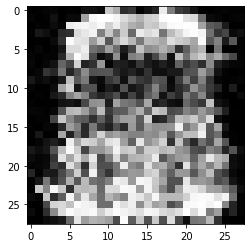

Number batches 78
31(0/78) D: 0.4684, G: 1.7183
31(1/78) D: 0.4754, G: 1.6655
31(2/78) D: 0.4669, G: 1.3218
31(3/78) D: 0.4675, G: 1.5836
31(4/78) D: 0.4853, G: 1.3843
31(5/78) D: 0.4375, G: 1.7589
31(6/78) D: 0.4680, G: 1.6819
31(7/78) D: 0.4457, G: 1.4733
31(8/78) D: 0.4615, G: 1.6051
31(9/78) D: 0.4787, G: 1.5349
31(10/78) D: 0.4594, G: 1.6135
31(11/78) D: 0.4675, G: 1.4596
31(12/78) D: 0.4194, G: 1.7086
31(13/78) D: 0.4885, G: 1.5693
31(14/78) D: 0.4237, G: 1.3567
31(15/78) D: 0.4560, G: 1.8910
31(16/78) D: 0.4674, G: 1.3477
31(17/78) D: 0.4447, G: 2.1564
31(18/78) D: 0.6155, G: 1.3263
31(19/78) D: 0.5731, G: 2.2936
31(20/78) D: 0.4961, G: 1.5709
31(21/78) D: 0.4943, G: 1.3685
31(22/78) D: 0.4933, G: 1.3050
31(23/78) D: 0.4840, G: 1.7434
31(24/78) D: 0.4498, G: 1.7019
31(25/78) D: 0.4143, G: 1.5473
31(26/78) D: 0.4281, G: 1.5038
31(27/78) D: 0.4576, G: 1.4325
31(28/78) D: 0.4788, G: 1.7576
31(29/78) D: 0.4350, G: 1.4289
31(30/78) D: 0.4579, G: 1.5193
31(31/78) D: 0.4248, G: 1.4312


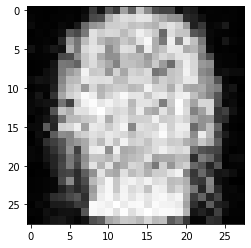

Number batches 78
32(0/78) D: 0.5241, G: 1.6323
32(1/78) D: 0.4732, G: 1.7130
32(2/78) D: 0.4358, G: 1.4162
32(3/78) D: 0.4805, G: 1.4881
32(4/78) D: 0.4619, G: 1.7387
32(5/78) D: 0.4456, G: 1.4902
32(6/78) D: 0.4674, G: 1.3879
32(7/78) D: 0.4624, G: 1.8271
32(8/78) D: 0.4553, G: 1.3892
32(9/78) D: 0.4428, G: 1.3897
32(10/78) D: 0.5140, G: 1.8583
32(11/78) D: 0.4582, G: 1.4923
32(12/78) D: 0.4904, G: 2.3626
32(13/78) D: 0.5114, G: 1.1395
32(14/78) D: 0.5074, G: 1.7066
32(15/78) D: 0.4300, G: 1.4087
32(16/78) D: 0.4593, G: 1.7835
32(17/78) D: 0.3996, G: 1.9378
32(18/78) D: 0.4317, G: 1.4446
32(19/78) D: 0.4989, G: 1.6435
32(20/78) D: 0.4210, G: 2.1285
32(21/78) D: 0.4103, G: 1.2218
32(22/78) D: 0.5009, G: 1.8942
32(23/78) D: 0.4927, G: 1.2213
32(24/78) D: 0.4864, G: 2.4213
32(25/78) D: 0.5508, G: 1.0658
32(26/78) D: 0.5531, G: 2.0608
32(27/78) D: 0.5899, G: 1.0227
32(28/78) D: 0.5022, G: 1.5723
32(29/78) D: 0.4759, G: 1.8418
32(30/78) D: 0.4769, G: 1.3017
32(31/78) D: 0.4760, G: 2.0126


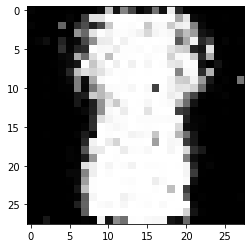

Number batches 78
33(0/78) D: 0.4700, G: 1.5428
33(1/78) D: 0.4628, G: 1.7457
33(2/78) D: 0.4568, G: 1.2636
33(3/78) D: 0.4647, G: 1.6124
33(4/78) D: 0.4369, G: 1.6894
33(5/78) D: 0.3863, G: 1.5554
33(6/78) D: 0.4394, G: 1.5477
33(7/78) D: 0.4419, G: 2.0302
33(8/78) D: 0.4814, G: 1.5207
33(9/78) D: 0.4656, G: 1.6331
33(10/78) D: 0.4514, G: 1.7472
33(11/78) D: 0.4439, G: 1.4673
33(12/78) D: 0.4486, G: 2.4533
33(13/78) D: 0.4366, G: 1.2474
33(14/78) D: 0.4353, G: 1.5916
33(15/78) D: 0.4546, G: 2.0351
33(16/78) D: 0.5457, G: 1.4500
33(17/78) D: 0.5053, G: 2.4324
33(18/78) D: 0.5113, G: 1.1279
33(19/78) D: 0.5156, G: 2.2030
33(20/78) D: 0.4365, G: 1.7070
33(21/78) D: 0.4282, G: 0.9526
33(22/78) D: 0.5375, G: 2.3702
33(23/78) D: 0.5400, G: 1.1796
33(24/78) D: 0.5308, G: 1.8561
33(25/78) D: 0.4328, G: 1.8120
33(26/78) D: 0.3952, G: 1.4153
33(27/78) D: 0.4333, G: 1.6277
33(28/78) D: 0.4908, G: 1.5694
33(29/78) D: 0.4617, G: 1.4317
33(30/78) D: 0.4578, G: 1.7881
33(31/78) D: 0.4251, G: 1.5675


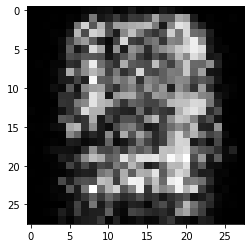

Number batches 78
34(0/78) D: 0.4817, G: 1.8616
34(1/78) D: 0.4438, G: 1.6646
34(2/78) D: 0.4322, G: 1.6489
34(3/78) D: 0.4276, G: 1.8979
34(4/78) D: 0.4435, G: 1.5207
34(5/78) D: 0.4666, G: 1.8899
34(6/78) D: 0.5646, G: 1.2867
34(7/78) D: 0.4991, G: 2.5993
34(8/78) D: 0.5769, G: 1.4716
34(9/78) D: 0.5127, G: 1.4718
34(10/78) D: 0.5314, G: 2.0836
34(11/78) D: 0.5358, G: 1.1284
34(12/78) D: 0.5064, G: 1.9376
34(13/78) D: 0.4862, G: 1.6067
34(14/78) D: 0.5039, G: 1.4194
34(15/78) D: 0.4882, G: 1.9725
34(16/78) D: 0.6104, G: 1.1536
34(17/78) D: 0.5067, G: 1.8142
34(18/78) D: 0.5416, G: 1.5029
34(19/78) D: 0.4980, G: 1.6927
34(20/78) D: 0.4528, G: 1.5816
34(21/78) D: 0.5302, G: 1.3072
34(22/78) D: 0.5169, G: 1.7760
34(23/78) D: 0.5001, G: 1.6161
34(24/78) D: 0.5093, G: 1.4991
34(25/78) D: 0.4662, G: 1.5739
34(26/78) D: 0.4782, G: 1.4383
34(27/78) D: 0.4766, G: 1.2878
34(28/78) D: 0.4861, G: 1.5566
34(29/78) D: 0.5044, G: 1.6327
34(30/78) D: 0.4861, G: 1.4384
34(31/78) D: 0.4019, G: 1.3101


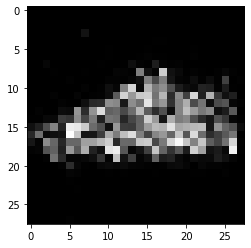

Number batches 78
35(0/78) D: 0.4552, G: 1.4332
35(1/78) D: 0.4408, G: 1.8643
35(2/78) D: 0.4681, G: 1.1132
35(3/78) D: 0.5122, G: 1.8618
35(4/78) D: 0.4609, G: 1.8241
35(5/78) D: 0.5074, G: 1.3101
35(6/78) D: 0.4802, G: 1.6106
35(7/78) D: 0.4317, G: 1.6564
35(8/78) D: 0.4214, G: 1.2909
35(9/78) D: 0.4715, G: 1.6024
35(10/78) D: 0.4813, G: 1.2850
35(11/78) D: 0.5464, G: 2.2540
35(12/78) D: 0.5217, G: 1.1465
35(13/78) D: 0.5202, G: 1.6900
35(14/78) D: 0.5166, G: 1.8240
35(15/78) D: 0.4686, G: 1.2071
35(16/78) D: 0.4851, G: 1.8470
35(17/78) D: 0.4317, G: 1.3026
35(18/78) D: 0.4691, G: 1.4417
35(19/78) D: 0.4479, G: 1.4483
35(20/78) D: 0.4743, G: 1.6767
35(21/78) D: 0.4777, G: 1.3013
35(22/78) D: 0.4709, G: 1.3114
35(23/78) D: 0.4921, G: 1.8698
35(24/78) D: 0.4692, G: 1.4889
35(25/78) D: 0.5134, G: 1.6575
35(26/78) D: 0.4672, G: 1.3982
35(27/78) D: 0.4758, G: 1.4954
35(28/78) D: 0.4911, G: 1.8573
35(29/78) D: 0.4558, G: 1.1561
35(30/78) D: 0.4936, G: 1.8767
35(31/78) D: 0.4518, G: 1.4324


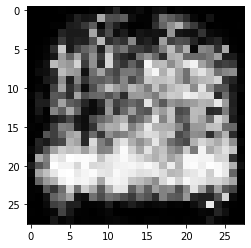

Number batches 78
36(0/78) D: 0.4870, G: 1.3088
36(1/78) D: 0.4225, G: 1.4852
36(2/78) D: 0.4766, G: 1.2305
36(3/78) D: 0.4727, G: 1.4629
36(4/78) D: 0.4215, G: 1.7222
36(5/78) D: 0.4685, G: 1.5099
36(6/78) D: 0.4294, G: 1.6603
36(7/78) D: 0.4690, G: 1.3553
36(8/78) D: 0.4778, G: 1.8678
36(9/78) D: 0.4812, G: 1.1532
36(10/78) D: 0.5188, G: 1.8918
36(11/78) D: 0.5471, G: 1.2488
36(12/78) D: 0.4710, G: 1.8306
36(13/78) D: 0.4717, G: 1.3108
36(14/78) D: 0.4810, G: 1.3829
36(15/78) D: 0.4077, G: 1.8082
36(16/78) D: 0.4499, G: 1.3755
36(17/78) D: 0.4288, G: 2.0990
36(18/78) D: 0.5112, G: 1.0956
36(19/78) D: 0.4922, G: 1.6216
36(20/78) D: 0.4435, G: 1.6402
36(21/78) D: 0.4330, G: 1.4184
36(22/78) D: 0.4703, G: 1.6032
36(23/78) D: 0.4611, G: 1.4988
36(24/78) D: 0.4282, G: 1.7839
36(25/78) D: 0.4781, G: 1.5235
36(26/78) D: 0.4739, G: 1.6432
36(27/78) D: 0.4644, G: 1.2607
36(28/78) D: 0.4927, G: 1.8024
36(29/78) D: 0.4583, G: 1.7018
36(30/78) D: 0.4364, G: 1.4934
36(31/78) D: 0.4595, G: 1.6588


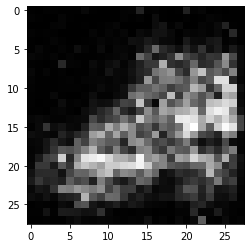

Number batches 78
37(0/78) D: 0.4464, G: 1.4509
37(1/78) D: 0.4326, G: 1.9027
37(2/78) D: 0.4637, G: 1.0396
37(3/78) D: 0.4710, G: 2.4038
37(4/78) D: 0.4366, G: 1.3904
37(5/78) D: 0.4258, G: 1.6620
37(6/78) D: 0.5012, G: 1.8941
37(7/78) D: 0.4155, G: 1.1588
37(8/78) D: 0.5145, G: 2.4848
37(9/78) D: 0.5319, G: 1.0583
37(10/78) D: 0.4891, G: 1.7660
37(11/78) D: 0.4350, G: 1.5245
37(12/78) D: 0.4637, G: 1.9087
37(13/78) D: 0.4963, G: 1.6280
37(14/78) D: 0.4899, G: 1.4107
37(15/78) D: 0.4986, G: 2.0073
37(16/78) D: 0.4971, G: 1.1145
37(17/78) D: 0.4692, G: 1.9421
37(18/78) D: 0.4584, G: 1.3270
37(19/78) D: 0.4368, G: 1.6270
37(20/78) D: 0.4511, G: 1.6379
37(21/78) D: 0.4301, G: 1.7016
37(22/78) D: 0.4671, G: 1.5711
37(23/78) D: 0.4389, G: 1.5081
37(24/78) D: 0.3603, G: 1.8610
37(25/78) D: 0.5403, G: 1.2013
37(26/78) D: 0.4815, G: 2.3218
37(27/78) D: 0.5054, G: 1.2521
37(28/78) D: 0.5039, G: 1.8539
37(29/78) D: 0.3853, G: 1.6652
37(30/78) D: 0.3900, G: 1.7152
37(31/78) D: 0.4413, G: 1.8226


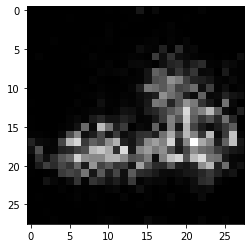

Number batches 78
38(0/78) D: 0.5271, G: 1.5884
38(1/78) D: 0.4382, G: 1.4995
38(2/78) D: 0.4340, G: 1.5277
38(3/78) D: 0.4346, G: 1.5173
38(4/78) D: 0.4621, G: 1.7518
38(5/78) D: 0.4705, G: 1.5418
38(6/78) D: 0.4560, G: 1.3886
38(7/78) D: 0.5081, G: 2.2179
38(8/78) D: 0.5006, G: 1.3291
38(9/78) D: 0.4612, G: 1.7341
38(10/78) D: 0.4332, G: 1.5382
38(11/78) D: 0.4419, G: 1.9357
38(12/78) D: 0.4787, G: 1.4325
38(13/78) D: 0.4348, G: 2.1933
38(14/78) D: 0.4815, G: 0.9128
38(15/78) D: 0.5817, G: 2.1848
38(16/78) D: 0.5259, G: 1.3821
38(17/78) D: 0.4464, G: 1.8481
38(18/78) D: 0.4374, G: 1.1974
38(19/78) D: 0.4373, G: 2.0344
38(20/78) D: 0.4440, G: 1.7497
38(21/78) D: 0.4241, G: 1.5548
38(22/78) D: 0.4616, G: 1.7008
38(23/78) D: 0.4144, G: 1.6696
38(24/78) D: 0.4240, G: 1.4694
38(25/78) D: 0.4688, G: 1.5216
38(26/78) D: 0.4817, G: 1.8865
38(27/78) D: 0.4958, G: 1.0681
38(28/78) D: 0.6126, G: 1.9754
38(29/78) D: 0.4830, G: 1.7127
38(30/78) D: 0.5178, G: 1.3377
38(31/78) D: 0.4576, G: 2.0549


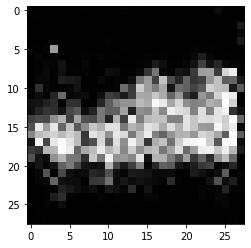

Number batches 78
39(0/78) D: 0.5007, G: 2.0278
39(1/78) D: 0.4404, G: 1.3447
39(2/78) D: 0.4645, G: 1.9083
39(3/78) D: 0.4650, G: 1.2852
39(4/78) D: 0.4916, G: 1.8300
39(5/78) D: 0.4667, G: 2.0275
39(6/78) D: 0.4771, G: 1.3242
39(7/78) D: 0.4756, G: 2.3372
39(8/78) D: 0.5024, G: 1.3687
39(9/78) D: 0.4737, G: 1.5084
39(10/78) D: 0.5287, G: 1.8736
39(11/78) D: 0.5564, G: 1.2336
39(12/78) D: 0.5799, G: 2.4802
39(13/78) D: 0.5720, G: 1.2896
39(14/78) D: 0.5230, G: 1.3351
39(15/78) D: 0.4857, G: 2.0271
39(16/78) D: 0.5307, G: 1.3713
39(17/78) D: 0.4647, G: 2.0820
39(18/78) D: 0.4804, G: 1.2286
39(19/78) D: 0.4637, G: 1.6405
39(20/78) D: 0.4431, G: 1.7153
39(21/78) D: 0.5001, G: 1.4248
39(22/78) D: 0.4660, G: 1.3822
39(23/78) D: 0.4514, G: 2.1006
39(24/78) D: 0.4730, G: 1.6758
39(25/78) D: 0.4770, G: 1.3968
39(26/78) D: 0.5106, G: 2.3666
39(27/78) D: 0.5762, G: 0.9417
39(28/78) D: 0.5835, G: 1.9363
39(29/78) D: 0.4885, G: 1.6645
39(30/78) D: 0.4732, G: 1.5754
39(31/78) D: 0.4102, G: 1.6012


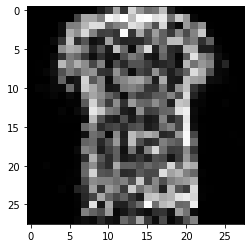

Number batches 78
40(0/78) D: 0.4690, G: 1.5686
40(1/78) D: 0.4617, G: 1.5237
40(2/78) D: 0.5119, G: 1.2401
40(3/78) D: 0.4738, G: 1.4803
40(4/78) D: 0.4472, G: 1.8106
40(5/78) D: 0.4529, G: 1.3423
40(6/78) D: 0.5011, G: 1.7306
40(7/78) D: 0.4552, G: 1.6464
40(8/78) D: 0.5141, G: 1.4923
40(9/78) D: 0.4981, G: 1.5263
40(10/78) D: 0.4703, G: 1.9023
40(11/78) D: 0.4159, G: 1.3884
40(12/78) D: 0.4774, G: 1.5976
40(13/78) D: 0.4213, G: 1.7923
40(14/78) D: 0.5019, G: 1.2722
40(15/78) D: 0.4757, G: 1.9652
40(16/78) D: 0.5014, G: 1.3230
40(17/78) D: 0.5090, G: 2.1506
40(18/78) D: 0.5210, G: 1.1149
40(19/78) D: 0.5262, G: 1.5071
40(20/78) D: 0.4863, G: 1.5973
40(21/78) D: 0.5355, G: 1.6688
40(22/78) D: 0.5786, G: 1.3246
40(23/78) D: 0.4692, G: 1.6490
40(24/78) D: 0.4634, G: 1.9059
40(25/78) D: 0.5016, G: 1.1109
40(26/78) D: 0.4963, G: 1.7175
40(27/78) D: 0.4751, G: 1.5733
40(28/78) D: 0.4979, G: 1.4046
40(29/78) D: 0.4594, G: 2.0274
40(30/78) D: 0.4652, G: 1.3108
40(31/78) D: 0.4643, G: 1.4381


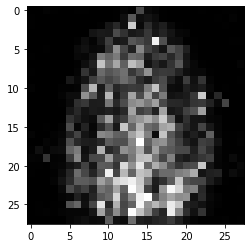

Number batches 78
41(0/78) D: 0.5219, G: 1.6071
41(1/78) D: 0.5173, G: 1.1697
41(2/78) D: 0.5408, G: 1.5993
41(3/78) D: 0.5011, G: 1.4285
41(4/78) D: 0.4170, G: 1.1831
41(5/78) D: 0.5112, G: 1.7738
41(6/78) D: 0.4819, G: 1.3845
41(7/78) D: 0.4707, G: 1.2816
41(8/78) D: 0.5625, G: 1.8177
41(9/78) D: 0.5408, G: 1.1077
41(10/78) D: 0.5589, G: 1.6345
41(11/78) D: 0.5524, G: 1.5657
41(12/78) D: 0.5339, G: 1.3092
41(13/78) D: 0.4782, G: 1.5586
41(14/78) D: 0.5629, G: 1.2312
41(15/78) D: 0.5200, G: 1.6429
41(16/78) D: 0.5211, G: 1.3323
41(17/78) D: 0.4319, G: 1.6772
41(18/78) D: 0.4734, G: 1.8115
41(19/78) D: 0.5525, G: 1.0677
41(20/78) D: 0.5458, G: 1.7924
41(21/78) D: 0.4890, G: 1.4239
41(22/78) D: 0.4638, G: 1.3056
41(23/78) D: 0.4776, G: 1.4455
41(24/78) D: 0.4437, G: 1.5728
41(25/78) D: 0.4756, G: 1.2453
41(26/78) D: 0.4744, G: 1.6966
41(27/78) D: 0.4962, G: 1.2742
41(28/78) D: 0.4947, G: 1.7802
41(29/78) D: 0.5231, G: 1.3984
41(30/78) D: 0.4371, G: 1.4958
41(31/78) D: 0.4790, G: 1.4511


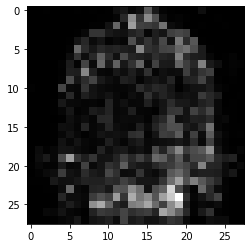

Number batches 78
42(0/78) D: 0.5310, G: 1.2512
42(1/78) D: 0.4882, G: 1.8622
42(2/78) D: 0.5229, G: 1.1101
42(3/78) D: 0.5043, G: 1.5496
42(4/78) D: 0.4633, G: 1.5422
42(5/78) D: 0.4978, G: 1.4395
42(6/78) D: 0.4564, G: 1.5986
42(7/78) D: 0.4425, G: 1.4087
42(8/78) D: 0.4445, G: 1.3765
42(9/78) D: 0.4444, G: 1.6612
42(10/78) D: 0.5236, G: 1.2510
42(11/78) D: 0.5210, G: 1.5634
42(12/78) D: 0.4726, G: 1.3923
42(13/78) D: 0.4872, G: 1.7771
42(14/78) D: 0.5108, G: 1.1627
42(15/78) D: 0.4726, G: 1.5360
42(16/78) D: 0.4766, G: 1.2743
42(17/78) D: 0.4616, G: 1.8897
42(18/78) D: 0.4489, G: 1.0425
42(19/78) D: 0.5336, G: 1.8768
42(20/78) D: 0.5292, G: 1.7429
42(21/78) D: 0.5567, G: 1.1098
42(22/78) D: 0.5362, G: 2.1429
42(23/78) D: 0.5725, G: 1.1547
42(24/78) D: 0.5271, G: 1.5429
42(25/78) D: 0.4766, G: 1.2881
42(26/78) D: 0.4902, G: 1.2142
42(27/78) D: 0.5406, G: 1.6084
42(28/78) D: 0.4730, G: 1.3286
42(29/78) D: 0.5474, G: 1.6104
42(30/78) D: 0.5018, G: 1.4485
42(31/78) D: 0.4873, G: 1.3191


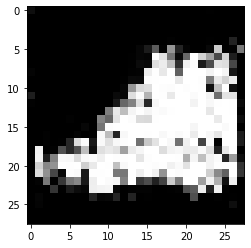

Number batches 78
43(0/78) D: 0.5373, G: 1.5018
43(1/78) D: 0.4877, G: 1.3367
43(2/78) D: 0.5027, G: 1.3080
43(3/78) D: 0.4838, G: 1.3524
43(4/78) D: 0.4850, G: 1.4100
43(5/78) D: 0.4951, G: 1.5086
43(6/78) D: 0.5073, G: 1.5576
43(7/78) D: 0.4950, G: 1.4030
43(8/78) D: 0.4707, G: 1.4323
43(9/78) D: 0.4770, G: 1.5391
43(10/78) D: 0.5126, G: 0.9876
43(11/78) D: 0.5138, G: 1.7693
43(12/78) D: 0.4978, G: 1.4109
43(13/78) D: 0.4685, G: 1.5906
43(14/78) D: 0.5442, G: 1.2848
43(15/78) D: 0.4785, G: 1.9090
43(16/78) D: 0.5466, G: 1.2497
43(17/78) D: 0.4801, G: 2.0425
43(18/78) D: 0.4702, G: 1.0663
43(19/78) D: 0.5872, G: 1.6142
43(20/78) D: 0.5150, G: 1.9315
43(21/78) D: 0.4864, G: 1.0352
43(22/78) D: 0.5449, G: 1.8636
43(23/78) D: 0.4768, G: 1.3366
43(24/78) D: 0.4581, G: 1.3343
43(25/78) D: 0.4864, G: 1.8198
43(26/78) D: 0.5743, G: 1.0762
43(27/78) D: 0.5172, G: 1.7750
43(28/78) D: 0.5504, G: 1.6452
43(29/78) D: 0.5065, G: 1.3551
43(30/78) D: 0.5026, G: 1.5289
43(31/78) D: 0.4756, G: 1.5507


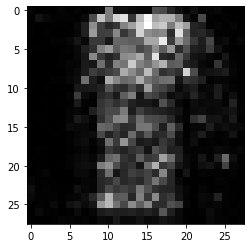

Number batches 78
44(0/78) D: 0.5253, G: 1.6006
44(1/78) D: 0.4666, G: 1.4045
44(2/78) D: 0.5034, G: 1.3660
44(3/78) D: 0.4710, G: 1.4776
44(4/78) D: 0.4651, G: 1.5523
44(5/78) D: 0.4623, G: 1.5862
44(6/78) D: 0.4925, G: 1.3333
44(7/78) D: 0.4996, G: 2.1149
44(8/78) D: 0.4828, G: 1.1729
44(9/78) D: 0.5142, G: 1.9333
44(10/78) D: 0.5353, G: 1.1581
44(11/78) D: 0.5004, G: 1.3807
44(12/78) D: 0.4823, G: 1.7605
44(13/78) D: 0.4603, G: 1.0662
44(14/78) D: 0.5769, G: 1.5136
44(15/78) D: 0.4535, G: 1.7663
44(16/78) D: 0.4731, G: 1.4018
44(17/78) D: 0.4693, G: 1.8643
44(18/78) D: 0.4637, G: 0.9361
44(19/78) D: 0.5618, G: 1.9209
44(20/78) D: 0.5292, G: 1.3069
44(21/78) D: 0.5187, G: 1.3237
44(22/78) D: 0.5556, G: 1.5732
44(23/78) D: 0.4959, G: 1.4409
44(24/78) D: 0.5028, G: 1.4392
44(25/78) D: 0.4587, G: 1.7489
44(26/78) D: 0.4714, G: 1.3330
44(27/78) D: 0.5104, G: 1.4160
44(28/78) D: 0.5031, G: 1.7141
44(29/78) D: 0.5266, G: 1.4341
44(30/78) D: 0.4542, G: 1.3248
44(31/78) D: 0.4851, G: 1.5173


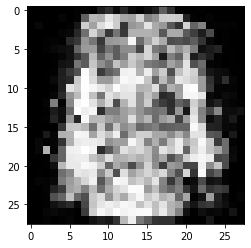

Number batches 78
45(0/78) D: 0.5198, G: 1.7076
45(1/78) D: 0.4531, G: 1.5058
45(2/78) D: 0.5115, G: 1.2120
45(3/78) D: 0.5289, G: 1.4563
45(4/78) D: 0.4677, G: 1.4573
45(5/78) D: 0.5161, G: 1.3683
45(6/78) D: 0.4516, G: 1.3787
45(7/78) D: 0.4798, G: 1.6130
45(8/78) D: 0.4679, G: 1.4444
45(9/78) D: 0.4520, G: 1.4666
45(10/78) D: 0.4360, G: 1.6531
45(11/78) D: 0.5619, G: 1.1404
45(12/78) D: 0.4826, G: 1.8115
45(13/78) D: 0.5570, G: 1.2554
45(14/78) D: 0.5236, G: 1.1571
45(15/78) D: 0.5118, G: 1.8124
45(16/78) D: 0.4929, G: 1.1823
45(17/78) D: 0.4899, G: 1.8621
45(18/78) D: 0.4863, G: 1.2240
45(19/78) D: 0.4828, G: 1.3704
45(20/78) D: 0.5284, G: 1.7986
45(21/78) D: 0.4839, G: 1.2814
45(22/78) D: 0.5398, G: 1.3442
45(23/78) D: 0.5038, G: 1.4422
45(24/78) D: 0.4556, G: 1.8856
45(25/78) D: 0.5410, G: 1.3253
45(26/78) D: 0.5482, G: 1.3760
45(27/78) D: 0.5163, G: 1.4456
45(28/78) D: 0.5337, G: 1.2887
45(29/78) D: 0.5001, G: 1.3334
45(30/78) D: 0.5064, G: 1.3141
45(31/78) D: 0.4601, G: 1.5919


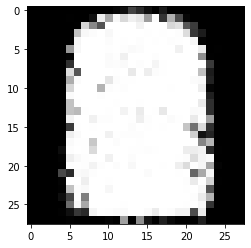

Number batches 78
46(0/78) D: 0.5105, G: 1.2673
46(1/78) D: 0.4872, G: 1.7054
46(2/78) D: 0.5472, G: 1.1570
46(3/78) D: 0.5832, G: 1.7398
46(4/78) D: 0.5072, G: 1.7295
46(5/78) D: 0.5156, G: 1.1549
46(6/78) D: 0.5281, G: 1.5628
46(7/78) D: 0.5221, G: 1.4560
46(8/78) D: 0.4591, G: 1.2825
46(9/78) D: 0.5097, G: 1.3771
46(10/78) D: 0.4839, G: 1.4450
46(11/78) D: 0.5317, G: 1.2155
46(12/78) D: 0.5518, G: 1.7672
46(13/78) D: 0.4616, G: 1.2763
46(14/78) D: 0.5296, G: 1.3471
46(15/78) D: 0.4811, G: 1.5313
46(16/78) D: 0.5250, G: 1.4293
46(17/78) D: 0.4853, G: 1.4761
46(18/78) D: 0.5043, G: 1.2950
46(19/78) D: 0.4941, G: 1.2544
46(20/78) D: 0.4414, G: 1.6063
46(21/78) D: 0.5665, G: 1.5295
46(22/78) D: 0.5155, G: 1.0581
46(23/78) D: 0.5365, G: 1.9280
46(24/78) D: 0.5660, G: 1.4664
46(25/78) D: 0.4388, G: 1.4907
46(26/78) D: 0.5280, G: 1.3077
46(27/78) D: 0.5241, G: 1.7240
46(28/78) D: 0.5080, G: 1.4209
46(29/78) D: 0.4499, G: 1.5308
46(30/78) D: 0.5366, G: 1.8534
46(31/78) D: 0.4934, G: 1.2167


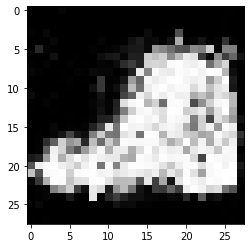

Number batches 78
47(0/78) D: 0.5379, G: 1.1244
47(1/78) D: 0.4706, G: 1.8279
47(2/78) D: 0.5442, G: 1.1767
47(3/78) D: 0.5306, G: 1.5059
47(4/78) D: 0.4980, G: 1.6960
47(5/78) D: 0.5363, G: 1.1807
47(6/78) D: 0.4966, G: 1.1669
47(7/78) D: 0.5034, G: 1.9209
47(8/78) D: 0.5003, G: 1.2927
47(9/78) D: 0.5086, G: 1.4324
47(10/78) D: 0.4982, G: 1.7663
47(11/78) D: 0.5610, G: 1.1410
47(12/78) D: 0.5482, G: 1.5655
47(13/78) D: 0.5178, G: 1.4161
47(14/78) D: 0.5080, G: 0.9532
47(15/78) D: 0.5786, G: 1.8876
47(16/78) D: 0.6050, G: 1.0752
47(17/78) D: 0.5367, G: 1.5356
47(18/78) D: 0.5379, G: 1.0891
47(19/78) D: 0.5372, G: 1.1568
47(20/78) D: 0.4942, G: 1.5792
47(21/78) D: 0.5420, G: 1.2936
47(22/78) D: 0.5032, G: 1.1394
47(23/78) D: 0.5154, G: 1.3747
47(24/78) D: 0.4531, G: 1.2988
47(25/78) D: 0.5420, G: 1.5367
47(26/78) D: 0.5691, G: 1.4486
47(27/78) D: 0.5221, G: 1.4059
47(28/78) D: 0.5013, G: 1.6040
47(29/78) D: 0.5100, G: 1.2260
47(30/78) D: 0.4991, G: 1.3867
47(31/78) D: 0.4952, G: 1.4361


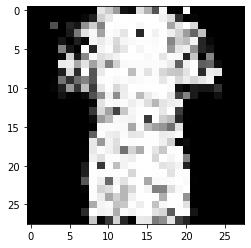

Number batches 78
48(0/78) D: 0.5078, G: 1.3954
48(1/78) D: 0.5112, G: 1.7774
48(2/78) D: 0.5346, G: 1.1377
48(3/78) D: 0.4303, G: 1.4549
48(4/78) D: 0.5053, G: 1.9306
48(5/78) D: 0.5231, G: 1.1165
48(6/78) D: 0.5089, G: 1.1173
48(7/78) D: 0.5540, G: 1.9790
48(8/78) D: 0.5906, G: 1.2977
48(9/78) D: 0.4878, G: 1.3692
48(10/78) D: 0.5330, G: 1.6278
48(11/78) D: 0.4912, G: 1.2609
48(12/78) D: 0.5265, G: 1.3731
48(13/78) D: 0.4526, G: 1.4712
48(14/78) D: 0.5002, G: 1.1956
48(15/78) D: 0.5505, G: 1.6439
48(16/78) D: 0.5264, G: 1.0070
48(17/78) D: 0.5113, G: 1.8278
48(18/78) D: 0.5567, G: 1.1683
48(19/78) D: 0.5125, G: 1.3362
48(20/78) D: 0.4798, G: 1.6869
48(21/78) D: 0.5584, G: 1.2385
48(22/78) D: 0.5031, G: 1.1538
48(23/78) D: 0.5210, G: 1.7754
48(24/78) D: 0.5292, G: 1.3730
48(25/78) D: 0.5466, G: 1.3612
48(26/78) D: 0.5179, G: 1.2188
48(27/78) D: 0.5054, G: 1.5472
48(28/78) D: 0.5385, G: 1.3164
48(29/78) D: 0.4887, G: 1.3867
48(30/78) D: 0.5009, G: 1.6032
48(31/78) D: 0.4910, G: 1.5182


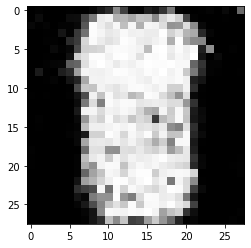

Number batches 78
49(0/78) D: 0.5173, G: 1.4774
49(1/78) D: 0.5068, G: 1.5774
49(2/78) D: 0.5302, G: 1.3156
49(3/78) D: 0.4823, G: 1.2357
49(4/78) D: 0.4816, G: 1.7584
49(5/78) D: 0.5024, G: 1.3372
49(6/78) D: 0.4997, G: 1.2231
49(7/78) D: 0.4655, G: 1.5663
49(8/78) D: 0.4730, G: 1.7400
49(9/78) D: 0.5057, G: 1.1480
49(10/78) D: 0.5209, G: 1.6362
49(11/78) D: 0.5176, G: 1.1643
49(12/78) D: 0.4472, G: 1.4662
49(13/78) D: 0.5126, G: 1.4647
49(14/78) D: 0.5400, G: 1.5067
49(15/78) D: 0.4804, G: 1.3568
49(16/78) D: 0.4958, G: 1.3486
49(17/78) D: 0.5463, G: 1.6922
49(18/78) D: 0.5286, G: 1.0944
49(19/78) D: 0.5211, G: 1.7299
49(20/78) D: 0.4349, G: 1.5324
49(21/78) D: 0.5036, G: 1.3759
49(22/78) D: 0.5242, G: 1.3440
49(23/78) D: 0.4876, G: 1.5380
49(24/78) D: 0.4802, G: 1.4984
49(25/78) D: 0.4898, G: 1.2013
49(26/78) D: 0.5395, G: 1.8311
49(27/78) D: 0.5180, G: 1.1669
49(28/78) D: 0.5795, G: 1.5827
49(29/78) D: 0.4803, G: 1.3461
49(30/78) D: 0.4931, G: 1.5761
49(31/78) D: 0.4809, G: 1.3337


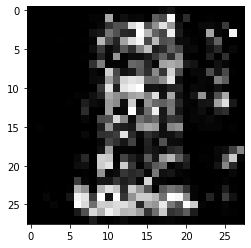

Number batches 78
50(0/78) D: 0.5570, G: 1.4205
50(1/78) D: 0.5509, G: 1.1939
50(2/78) D: 0.5305, G: 1.6089
50(3/78) D: 0.5329, G: 1.0922
50(4/78) D: 0.4986, G: 1.6808
50(5/78) D: 0.4763, G: 1.1774
50(6/78) D: 0.4783, G: 1.1036
50(7/78) D: 0.5175, G: 1.9358
50(8/78) D: 0.6057, G: 1.1648
50(9/78) D: 0.5055, G: 1.3366
50(10/78) D: 0.4482, G: 1.7061
50(11/78) D: 0.5569, G: 1.1805
50(12/78) D: 0.5157, G: 1.6450
50(13/78) D: 0.4368, G: 1.4416
50(14/78) D: 0.5301, G: 1.0227
50(15/78) D: 0.5275, G: 1.5825
50(16/78) D: 0.4879, G: 1.1473
50(17/78) D: 0.5003, G: 1.8097
50(18/78) D: 0.5052, G: 1.2688
50(19/78) D: 0.4764, G: 1.3162
50(20/78) D: 0.4661, G: 1.5616
50(21/78) D: 0.5278, G: 1.5050
50(22/78) D: 0.5537, G: 0.9999
50(23/78) D: 0.5303, G: 1.8740
50(24/78) D: 0.4904, G: 1.5629
50(25/78) D: 0.5615, G: 1.0554
50(26/78) D: 0.5353, G: 1.5004
50(27/78) D: 0.5729, G: 1.2984
50(28/78) D: 0.4922, G: 1.3976
50(29/78) D: 0.5094, G: 1.2955
50(30/78) D: 0.5263, G: 1.5290
50(31/78) D: 0.5140, G: 1.4841


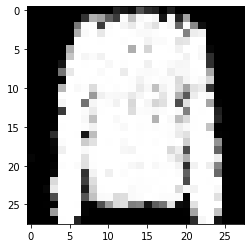

Number batches 78
51(0/78) D: 0.5598, G: 1.6058
51(1/78) D: 0.5000, G: 1.1469
51(2/78) D: 0.5402, G: 1.3245
51(3/78) D: 0.5580, G: 1.3432
51(4/78) D: 0.5351, G: 1.5410
51(5/78) D: 0.5407, G: 1.2499
51(6/78) D: 0.5636, G: 1.1227
51(7/78) D: 0.5201, G: 1.6541
51(8/78) D: 0.5496, G: 1.0692
51(9/78) D: 0.5463, G: 1.3341
51(10/78) D: 0.4825, G: 1.6328
51(11/78) D: 0.5238, G: 1.1423
51(12/78) D: 0.5135, G: 1.6057
51(13/78) D: 0.4863, G: 1.5618
51(14/78) D: 0.5553, G: 1.1048
51(15/78) D: 0.5412, G: 1.6437
51(16/78) D: 0.5716, G: 1.3009
51(17/78) D: 0.4635, G: 1.4943
51(18/78) D: 0.4741, G: 1.2571
51(19/78) D: 0.4832, G: 1.1092
51(20/78) D: 0.5278, G: 1.5681
51(21/78) D: 0.5127, G: 1.4917
51(22/78) D: 0.5623, G: 1.1078
51(23/78) D: 0.5274, G: 1.4277
51(24/78) D: 0.4854, G: 1.5759
51(25/78) D: 0.5496, G: 1.3507
51(26/78) D: 0.5130, G: 1.2039
51(27/78) D: 0.5987, G: 1.3701
51(28/78) D: 0.5012, G: 1.1772
51(29/78) D: 0.5176, G: 1.6456
51(30/78) D: 0.4807, G: 1.4374
51(31/78) D: 0.4835, G: 1.2315


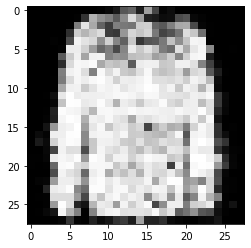

Number batches 78
52(0/78) D: 0.5619, G: 1.4910
52(1/78) D: 0.4793, G: 1.7453
52(2/78) D: 0.5296, G: 0.9854
52(3/78) D: 0.5437, G: 1.5278
52(4/78) D: 0.4951, G: 1.8041
52(5/78) D: 0.5499, G: 1.2657
52(6/78) D: 0.4884, G: 1.4353
52(7/78) D: 0.4922, G: 1.4655
52(8/78) D: 0.5243, G: 1.3248
52(9/78) D: 0.5032, G: 1.6071
52(10/78) D: 0.5081, G: 1.2097
52(11/78) D: 0.4690, G: 1.5040
52(12/78) D: 0.4719, G: 1.4454
52(13/78) D: 0.5027, G: 1.5807
52(14/78) D: 0.5718, G: 1.4470
52(15/78) D: 0.5320, G: 1.3759
52(16/78) D: 0.5052, G: 1.1626
52(17/78) D: 0.5017, G: 1.7784
52(18/78) D: 0.5492, G: 1.3692
52(19/78) D: 0.5263, G: 1.2606
52(20/78) D: 0.5292, G: 1.4775
52(21/78) D: 0.5304, G: 1.5374
52(22/78) D: 0.5143, G: 1.1248
52(23/78) D: 0.5346, G: 1.6003
52(24/78) D: 0.4855, G: 1.3832
52(25/78) D: 0.5448, G: 1.1121
52(26/78) D: 0.5873, G: 1.5951
52(27/78) D: 0.5581, G: 1.1566
52(28/78) D: 0.5607, G: 1.8021
52(29/78) D: 0.5383, G: 1.4501
52(30/78) D: 0.5178, G: 1.1272
52(31/78) D: 0.4643, G: 1.5501


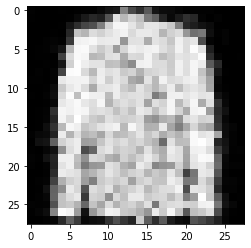

Number batches 78
53(0/78) D: 0.4771, G: 1.4065
53(1/78) D: 0.5414, G: 1.3087
53(2/78) D: 0.4874, G: 1.3308
53(3/78) D: 0.5540, G: 1.5450
53(4/78) D: 0.4884, G: 1.5767
53(5/78) D: 0.4763, G: 1.3194
53(6/78) D: 0.5160, G: 1.4514
53(7/78) D: 0.5041, G: 1.4393
53(8/78) D: 0.5588, G: 1.3328
53(9/78) D: 0.5058, G: 1.5620
53(10/78) D: 0.4504, G: 1.1565
53(11/78) D: 0.4913, G: 1.7189
53(12/78) D: 0.5440, G: 1.3715
53(13/78) D: 0.5177, G: 1.5574
53(14/78) D: 0.5272, G: 1.1775
53(15/78) D: 0.5449, G: 1.7562
53(16/78) D: 0.5395, G: 1.0667
53(17/78) D: 0.4609, G: 1.6372
53(18/78) D: 0.5260, G: 1.3927
53(19/78) D: 0.5199, G: 1.3339
53(20/78) D: 0.5165, G: 1.5048
53(21/78) D: 0.5449, G: 1.2254
53(22/78) D: 0.5404, G: 1.0671
53(23/78) D: 0.5221, G: 1.9829
53(24/78) D: 0.5561, G: 1.3978
53(25/78) D: 0.6056, G: 1.0976
53(26/78) D: 0.5421, G: 1.4710
53(27/78) D: 0.5865, G: 1.4690
53(28/78) D: 0.5450, G: 1.1782
53(29/78) D: 0.5434, G: 1.6147
53(30/78) D: 0.5929, G: 1.1018
53(31/78) D: 0.5494, G: 1.3043


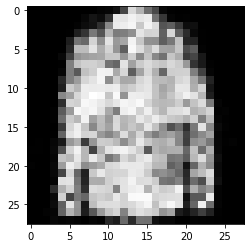

Number batches 78
54(0/78) D: 0.4633, G: 1.5057
54(1/78) D: 0.4720, G: 1.2534
54(2/78) D: 0.4839, G: 1.4556
54(3/78) D: 0.4761, G: 1.1466
54(4/78) D: 0.4633, G: 1.6490
54(5/78) D: 0.5397, G: 1.3033
54(6/78) D: 0.5128, G: 1.3259
54(7/78) D: 0.4988, G: 1.4522
54(8/78) D: 0.5048, G: 1.4219
54(9/78) D: 0.5548, G: 1.6352
54(10/78) D: 0.4711, G: 1.2079
54(11/78) D: 0.5885, G: 1.5481
54(12/78) D: 0.5621, G: 1.6039
54(13/78) D: 0.5152, G: 1.1315
54(14/78) D: 0.5077, G: 1.5237
54(15/78) D: 0.5357, G: 1.4876
54(16/78) D: 0.5258, G: 1.1521
54(17/78) D: 0.5163, G: 2.2312
54(18/78) D: 0.6015, G: 1.1117
54(19/78) D: 0.5278, G: 1.0957
54(20/78) D: 0.4306, G: 1.7559
54(21/78) D: 0.5129, G: 1.1747
54(22/78) D: 0.5097, G: 1.2281
54(23/78) D: 0.4265, G: 1.6404
54(24/78) D: 0.4593, G: 1.2056
54(25/78) D: 0.4429, G: 1.2542
54(26/78) D: 0.5069, G: 1.5851
54(27/78) D: 0.5250, G: 1.4294
54(28/78) D: 0.4730, G: 1.3458
54(29/78) D: 0.5038, G: 1.7137
54(30/78) D: 0.4746, G: 1.5226
54(31/78) D: 0.4853, G: 1.2727


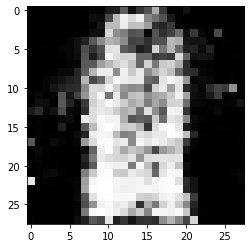

Number batches 78
55(0/78) D: 0.4985, G: 1.2718
55(1/78) D: 0.5485, G: 1.5826
55(2/78) D: 0.5564, G: 1.6085
55(3/78) D: 0.5430, G: 1.0536
55(4/78) D: 0.5953, G: 1.5467
55(5/78) D: 0.5433, G: 1.4266
55(6/78) D: 0.5745, G: 1.2667
55(7/78) D: 0.4817, G: 1.6479
55(8/78) D: 0.5118, G: 1.2311
55(9/78) D: 0.5519, G: 1.4477
55(10/78) D: 0.5373, G: 1.2315
55(11/78) D: 0.4933, G: 1.6075
55(12/78) D: 0.5140, G: 1.6374
55(13/78) D: 0.4669, G: 1.4429
55(14/78) D: 0.5321, G: 1.0768
55(15/78) D: 0.6012, G: 1.8018
55(16/78) D: 0.5854, G: 1.0080
55(17/78) D: 0.5268, G: 1.5303
55(18/78) D: 0.5041, G: 1.4294
55(19/78) D: 0.5548, G: 1.1361
55(20/78) D: 0.4889, G: 1.4917
55(21/78) D: 0.5228, G: 1.2687
55(22/78) D: 0.5470, G: 0.9510
55(23/78) D: 0.5235, G: 1.4181
55(24/78) D: 0.4801, G: 1.6018
55(25/78) D: 0.5587, G: 1.3825
55(26/78) D: 0.5541, G: 1.1469
55(27/78) D: 0.5009, G: 1.5391
55(28/78) D: 0.5076, G: 1.5296
55(29/78) D: 0.5491, G: 1.2274
55(30/78) D: 0.6125, G: 1.3112
55(31/78) D: 0.5175, G: 1.3788


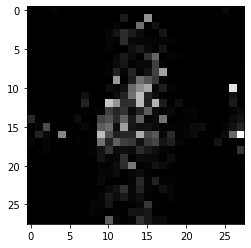

Number batches 78
56(0/78) D: 0.5109, G: 1.2314
56(1/78) D: 0.5171, G: 1.7023
56(2/78) D: 0.5285, G: 1.2495
56(3/78) D: 0.5589, G: 1.2247
56(4/78) D: 0.5283, G: 1.7260
56(5/78) D: 0.4993, G: 1.3328
56(6/78) D: 0.5541, G: 1.0890
56(7/78) D: 0.4907, G: 1.7842
56(8/78) D: 0.5470, G: 1.1511
56(9/78) D: 0.5319, G: 1.3036
56(10/78) D: 0.5591, G: 1.7552
56(11/78) D: 0.5217, G: 0.9810
56(12/78) D: 0.5760, G: 1.9706
56(13/78) D: 0.5325, G: 1.3515
56(14/78) D: 0.5684, G: 0.9189
56(15/78) D: 0.5479, G: 1.6384
56(16/78) D: 0.5746, G: 1.0089
56(17/78) D: 0.5950, G: 1.5978
56(18/78) D: 0.5791, G: 0.9892
56(19/78) D: 0.6548, G: 1.3556
56(20/78) D: 0.4705, G: 1.3144
56(21/78) D: 0.5155, G: 1.2174
56(22/78) D: 0.5683, G: 1.2135
56(23/78) D: 0.5064, G: 1.1840
56(24/78) D: 0.4836, G: 1.8054
56(25/78) D: 0.5648, G: 1.1985
56(26/78) D: 0.5026, G: 1.3047
56(27/78) D: 0.5301, G: 1.6267
56(28/78) D: 0.5387, G: 1.1051
56(29/78) D: 0.4819, G: 1.5285
56(30/78) D: 0.5253, G: 1.3659
56(31/78) D: 0.4941, G: 1.5304


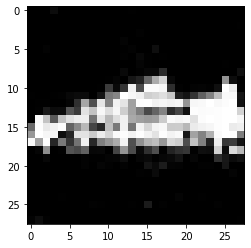

Number batches 78
57(0/78) D: 0.5073, G: 1.0964
57(1/78) D: 0.4969, G: 1.4892
57(2/78) D: 0.4998, G: 1.1992
57(3/78) D: 0.5201, G: 1.2692
57(4/78) D: 0.4965, G: 1.2478
57(5/78) D: 0.5198, G: 1.2905
57(6/78) D: 0.5353, G: 1.5288
57(7/78) D: 0.4895, G: 1.4005
57(8/78) D: 0.4903, G: 1.1836
57(9/78) D: 0.5101, G: 1.5470
57(10/78) D: 0.5245, G: 1.4006
57(11/78) D: 0.5729, G: 1.2342
57(12/78) D: 0.5297, G: 1.4835
57(13/78) D: 0.4881, G: 1.2327
57(14/78) D: 0.4793, G: 1.2418
57(15/78) D: 0.5044, G: 1.6877
57(16/78) D: 0.5563, G: 1.0701
57(17/78) D: 0.4945, G: 1.4427
57(18/78) D: 0.5437, G: 1.1753
57(19/78) D: 0.5316, G: 1.3486
57(20/78) D: 0.4515, G: 1.5961
57(21/78) D: 0.4987, G: 1.1839
57(22/78) D: 0.6081, G: 1.1803
57(23/78) D: 0.5235, G: 1.5493
57(24/78) D: 0.4801, G: 1.4410
57(25/78) D: 0.5567, G: 1.2219
57(26/78) D: 0.4921, G: 1.4097
57(27/78) D: 0.5861, G: 1.3456
57(28/78) D: 0.5048, G: 1.3176
57(29/78) D: 0.5317, G: 1.5562
57(30/78) D: 0.5022, G: 1.4070
57(31/78) D: 0.4777, G: 1.4746


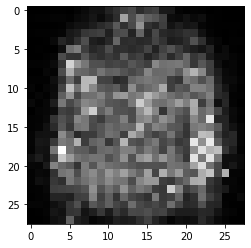

Number batches 78
58(0/78) D: 0.5475, G: 1.3726
58(1/78) D: 0.4942, G: 1.2705
58(2/78) D: 0.5271, G: 1.6286
58(3/78) D: 0.5183, G: 1.3099
58(4/78) D: 0.4751, G: 1.3166
58(5/78) D: 0.4989, G: 1.5335
58(6/78) D: 0.5322, G: 1.1483
58(7/78) D: 0.4688, G: 1.2878
58(8/78) D: 0.4695, G: 1.6314
58(9/78) D: 0.4708, G: 1.2366
58(10/78) D: 0.4532, G: 1.2424
58(11/78) D: 0.4918, G: 1.5009
58(12/78) D: 0.4311, G: 1.4833
58(13/78) D: 0.4165, G: 1.5409
58(14/78) D: 0.4629, G: 1.0781
58(15/78) D: 0.5268, G: 1.8210
58(16/78) D: 0.5196, G: 1.1703
58(17/78) D: 0.4866, G: 1.5544
58(18/78) D: 0.4593, G: 1.4200
58(19/78) D: 0.5273, G: 1.4213
58(20/78) D: 0.5102, G: 1.8505
58(21/78) D: 0.4730, G: 1.1584
58(22/78) D: 0.5617, G: 1.7077
58(23/78) D: 0.5610, G: 1.2917
58(24/78) D: 0.5069, G: 1.5052
58(25/78) D: 0.5050, G: 1.3404
58(26/78) D: 0.5194, G: 1.3199
58(27/78) D: 0.4735, G: 1.6377
58(28/78) D: 0.5242, G: 1.1544
58(29/78) D: 0.5570, G: 1.5745
58(30/78) D: 0.4832, G: 1.5744
58(31/78) D: 0.5625, G: 1.1157


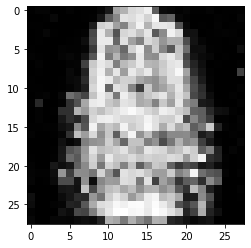

Number batches 78
59(0/78) D: 0.5381, G: 1.5313
59(1/78) D: 0.5433, G: 1.2384
59(2/78) D: 0.4852, G: 1.4420
59(3/78) D: 0.5007, G: 1.5715
59(4/78) D: 0.5493, G: 1.2863
59(5/78) D: 0.6016, G: 1.6250
59(6/78) D: 0.6263, G: 0.9958
59(7/78) D: 0.5981, G: 1.8639
59(8/78) D: 0.4782, G: 1.2789
59(9/78) D: 0.5196, G: 1.0782
59(10/78) D: 0.5154, G: 1.8917
59(11/78) D: 0.5184, G: 1.3939
59(12/78) D: 0.5142, G: 1.3111
59(13/78) D: 0.5306, G: 1.7463
59(14/78) D: 0.5646, G: 1.0163
59(15/78) D: 0.5047, G: 1.5717
59(16/78) D: 0.5253, G: 1.1235
59(17/78) D: 0.5708, G: 1.8873
59(18/78) D: 0.5301, G: 1.0953
59(19/78) D: 0.5139, G: 1.3817
59(20/78) D: 0.4595, G: 1.7299
59(21/78) D: 0.4650, G: 1.2376
59(22/78) D: 0.5204, G: 1.1819
59(23/78) D: 0.4758, G: 1.4496
59(24/78) D: 0.4747, G: 1.7159
59(25/78) D: 0.4734, G: 1.1957
59(26/78) D: 0.5492, G: 1.4413
59(27/78) D: 0.5401, G: 1.4434
59(28/78) D: 0.5354, G: 1.3052
59(29/78) D: 0.4812, G: 1.5398
59(30/78) D: 0.4892, G: 1.2561
59(31/78) D: 0.4908, G: 1.5373


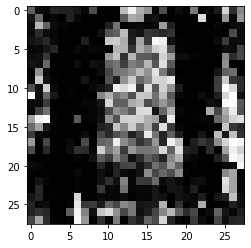

Number batches 78
60(0/78) D: 0.5734, G: 1.4200
60(1/78) D: 0.4936, G: 1.4836
60(2/78) D: 0.5367, G: 1.2624
60(3/78) D: 0.4976, G: 1.6907
60(4/78) D: 0.4598, G: 1.9474
60(5/78) D: 0.5584, G: 0.8775
60(6/78) D: 0.6100, G: 1.8665
60(7/78) D: 0.5556, G: 1.3701
60(8/78) D: 0.5095, G: 1.0496
60(9/78) D: 0.5638, G: 1.9614
60(10/78) D: 0.5966, G: 1.1929
60(11/78) D: 0.4974, G: 1.2765
60(12/78) D: 0.5273, G: 1.5954
60(13/78) D: 0.4663, G: 1.2978
60(14/78) D: 0.5233, G: 1.1753
60(15/78) D: 0.5121, G: 1.6477
60(16/78) D: 0.5256, G: 1.4125
60(17/78) D: 0.6014, G: 1.5245
60(18/78) D: 0.5392, G: 1.2748
60(19/78) D: 0.5642, G: 1.0926
60(20/78) D: 0.5243, G: 1.7554
60(21/78) D: 0.5697, G: 1.3368
60(22/78) D: 0.5649, G: 1.1430
60(23/78) D: 0.5377, G: 1.5339
60(24/78) D: 0.4730, G: 1.3931
60(25/78) D: 0.5075, G: 1.2678
60(26/78) D: 0.5000, G: 1.4121
60(27/78) D: 0.4892, G: 1.1848
60(28/78) D: 0.5114, G: 1.6141
60(29/78) D: 0.4401, G: 1.4649
60(30/78) D: 0.5259, G: 1.4876
60(31/78) D: 0.5077, G: 1.2359


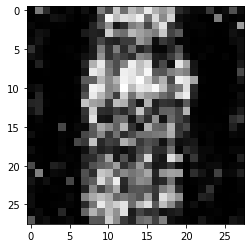

Number batches 78
61(0/78) D: 0.5554, G: 1.4510
61(1/78) D: 0.5501, G: 1.5874
61(2/78) D: 0.5952, G: 1.0454
61(3/78) D: 0.5732, G: 1.5312
61(4/78) D: 0.5374, G: 1.2482
61(5/78) D: 0.5249, G: 1.3483
61(6/78) D: 0.5622, G: 1.2334
61(7/78) D: 0.5127, G: 1.2616
61(8/78) D: 0.5364, G: 1.5901
61(9/78) D: 0.5611, G: 1.2696
61(10/78) D: 0.5234, G: 1.2992
61(11/78) D: 0.4870, G: 1.3051
61(12/78) D: 0.4819, G: 1.3965
61(13/78) D: 0.4341, G: 1.2927
61(14/78) D: 0.5643, G: 1.3185
61(15/78) D: 0.5128, G: 1.5559
61(16/78) D: 0.5301, G: 1.2118
61(17/78) D: 0.5642, G: 1.8406
61(18/78) D: 0.6497, G: 1.0310
61(19/78) D: 0.5111, G: 1.1453
61(20/78) D: 0.4845, G: 1.7825
61(21/78) D: 0.5737, G: 1.2151
61(22/78) D: 0.5032, G: 1.1486
61(23/78) D: 0.5010, G: 1.5707
61(24/78) D: 0.4665, G: 1.5173
61(25/78) D: 0.4970, G: 1.0190
61(26/78) D: 0.5505, G: 1.2933
61(27/78) D: 0.5613, G: 1.6224
61(28/78) D: 0.4772, G: 1.3730
61(29/78) D: 0.4466, G: 1.2578
61(30/78) D: 0.4314, G: 1.3580
61(31/78) D: 0.4554, G: 1.3933


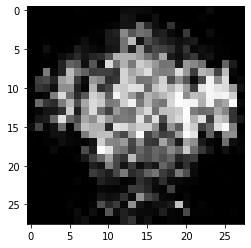

Number batches 78
62(0/78) D: 0.4955, G: 1.4170
62(1/78) D: 0.5041, G: 1.6068
62(2/78) D: 0.5246, G: 1.0624
62(3/78) D: 0.5230, G: 1.4049
62(4/78) D: 0.4716, G: 1.5201
62(5/78) D: 0.4798, G: 1.2826
62(6/78) D: 0.5266, G: 1.3098
62(7/78) D: 0.5059, G: 1.4229
62(8/78) D: 0.5163, G: 1.1759
62(9/78) D: 0.4964, G: 1.4737
62(10/78) D: 0.5727, G: 1.3110
62(11/78) D: 0.5558, G: 1.2362
62(12/78) D: 0.5445, G: 1.4147
62(13/78) D: 0.5275, G: 1.4236
62(14/78) D: 0.5166, G: 1.0987
62(15/78) D: 0.5193, G: 1.5062
62(16/78) D: 0.5359, G: 1.3019
62(17/78) D: 0.5707, G: 1.7407
62(18/78) D: 0.5609, G: 1.0739
62(19/78) D: 0.5653, G: 1.3332
62(20/78) D: 0.4947, G: 1.6290
62(21/78) D: 0.5360, G: 1.1786
62(22/78) D: 0.6110, G: 1.3290
62(23/78) D: 0.5137, G: 1.3962
62(24/78) D: 0.4569, G: 1.3828
62(25/78) D: 0.4269, G: 1.2395
62(26/78) D: 0.6043, G: 1.9354
62(27/78) D: 0.5767, G: 1.2229
62(28/78) D: 0.4940, G: 1.1490
62(29/78) D: 0.5439, G: 1.5290
62(30/78) D: 0.4941, G: 1.4812
62(31/78) D: 0.5493, G: 1.0714


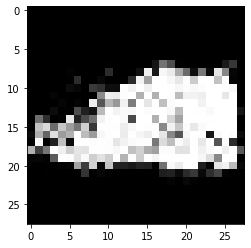

Number batches 78
63(0/78) D: 0.5355, G: 1.5122
63(1/78) D: 0.5136, G: 1.2064
63(2/78) D: 0.5175, G: 1.2313
63(3/78) D: 0.4867, G: 1.3776
63(4/78) D: 0.5074, G: 1.2643
63(5/78) D: 0.4802, G: 1.4819
63(6/78) D: 0.5603, G: 1.1543
63(7/78) D: 0.5369, G: 1.3235
63(8/78) D: 0.5620, G: 1.4030
63(9/78) D: 0.5819, G: 1.1670
63(10/78) D: 0.5970, G: 1.5172
63(11/78) D: 0.5224, G: 1.3583
63(12/78) D: 0.5768, G: 1.4483
63(13/78) D: 0.5279, G: 1.3270
63(14/78) D: 0.5748, G: 1.2506
63(15/78) D: 0.5504, G: 1.2427
63(16/78) D: 0.5742, G: 1.2054
63(17/78) D: 0.5142, G: 1.3837
63(18/78) D: 0.5564, G: 1.1138
63(19/78) D: 0.5541, G: 1.3283
63(20/78) D: 0.5295, G: 1.4300
63(21/78) D: 0.5971, G: 1.1669
63(22/78) D: 0.5728, G: 1.1307
63(23/78) D: 0.4901, G: 1.3960
63(24/78) D: 0.4638, G: 1.3466
63(25/78) D: 0.5440, G: 1.3806
63(26/78) D: 0.5081, G: 1.3793
63(27/78) D: 0.5980, G: 1.4302
63(28/78) D: 0.5136, G: 1.3483
63(29/78) D: 0.4944, G: 1.2013
63(30/78) D: 0.5351, G: 1.3404
63(31/78) D: 0.5764, G: 1.5014


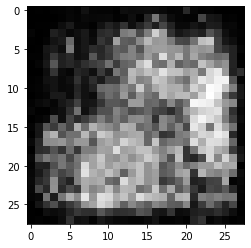

Number batches 78
64(0/78) D: 0.5162, G: 1.4247
64(1/78) D: 0.5339, G: 1.1615
64(2/78) D: 0.4777, G: 1.0991
64(3/78) D: 0.5142, G: 1.5851
64(4/78) D: 0.4894, G: 1.1769
64(5/78) D: 0.5224, G: 1.2584
64(6/78) D: 0.5097, G: 1.3218
64(7/78) D: 0.5186, G: 1.3619
64(8/78) D: 0.4780, G: 1.1819
64(9/78) D: 0.5202, G: 1.5034
64(10/78) D: 0.5499, G: 1.1773
64(11/78) D: 0.5366, G: 1.3142
64(12/78) D: 0.4539, G: 1.4626
64(13/78) D: 0.4486, G: 1.6219
64(14/78) D: 0.5030, G: 1.1341
64(15/78) D: 0.5096, G: 1.5399
64(16/78) D: 0.4991, G: 1.5437
64(17/78) D: 0.4781, G: 1.1530
64(18/78) D: 0.5605, G: 1.5425
64(19/78) D: 0.5248, G: 1.3535
64(20/78) D: 0.5120, G: 1.4059
64(21/78) D: 0.5024, G: 1.4054
64(22/78) D: 0.5251, G: 1.1974
64(23/78) D: 0.5339, G: 1.6364
64(24/78) D: 0.5482, G: 1.5890
64(25/78) D: 0.5526, G: 1.1296
64(26/78) D: 0.5291, G: 1.4532
64(27/78) D: 0.5964, G: 1.2548
64(28/78) D: 0.4845, G: 1.3481
64(29/78) D: 0.4845, G: 1.2709
64(30/78) D: 0.5014, G: 1.3033
64(31/78) D: 0.5021, G: 1.4063


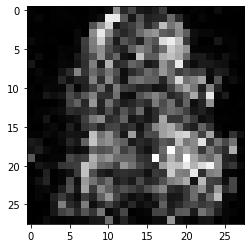

Number batches 78
65(0/78) D: 0.4901, G: 1.4340
65(1/78) D: 0.5285, G: 1.4494
65(2/78) D: 0.5479, G: 1.0660
65(3/78) D: 0.5396, G: 1.5770
65(4/78) D: 0.5686, G: 1.1887
65(5/78) D: 0.5188, G: 1.1245
65(6/78) D: 0.5588, G: 1.4904
65(7/78) D: 0.5269, G: 1.3136
65(8/78) D: 0.5429, G: 1.5351
65(9/78) D: 0.5954, G: 1.2880
65(10/78) D: 0.5292, G: 1.3432
65(11/78) D: 0.5668, G: 1.2227
65(12/78) D: 0.5267, G: 1.3174
65(13/78) D: 0.5226, G: 1.0789
65(14/78) D: 0.5710, G: 1.3745
65(15/78) D: 0.5006, G: 1.4611
65(16/78) D: 0.5305, G: 1.0576
65(17/78) D: 0.5717, G: 1.8158
65(18/78) D: 0.5570, G: 1.1754
65(19/78) D: 0.5620, G: 1.1474
65(20/78) D: 0.5267, G: 1.7412
65(21/78) D: 0.5239, G: 1.2155
65(22/78) D: 0.5404, G: 1.0323
65(23/78) D: 0.5217, G: 1.5558
65(24/78) D: 0.4724, G: 1.4810
65(25/78) D: 0.5059, G: 1.1289
65(26/78) D: 0.5433, G: 1.2375
65(27/78) D: 0.5284, G: 1.5351
65(28/78) D: 0.5557, G: 1.2546
65(29/78) D: 0.4995, G: 1.2922
65(30/78) D: 0.5126, G: 1.4646
65(31/78) D: 0.5245, G: 1.1657


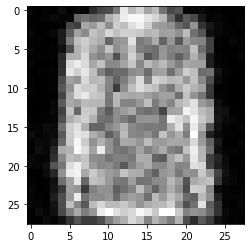

Number batches 78
66(0/78) D: 0.5394, G: 1.4269
66(1/78) D: 0.5194, G: 1.3949
66(2/78) D: 0.5427, G: 1.3168
66(3/78) D: 0.5558, G: 1.4158
66(4/78) D: 0.5445, G: 1.3681
66(5/78) D: 0.4618, G: 1.0989
66(6/78) D: 0.5338, G: 1.4593
66(7/78) D: 0.5162, G: 1.5745
66(8/78) D: 0.5323, G: 1.0796
66(9/78) D: 0.5001, G: 1.3482
66(10/78) D: 0.5435, G: 1.5198
66(11/78) D: 0.4683, G: 0.9493
66(12/78) D: 0.5530, G: 1.6828
66(13/78) D: 0.4979, G: 1.3865
66(14/78) D: 0.6018, G: 0.8301
66(15/78) D: 0.6169, G: 1.7987
66(16/78) D: 0.5875, G: 1.3522
66(17/78) D: 0.4456, G: 1.2446
66(18/78) D: 0.5357, G: 1.5345
66(19/78) D: 0.5519, G: 1.2660
66(20/78) D: 0.4921, G: 1.4071
66(21/78) D: 0.5458, G: 1.5351
66(22/78) D: 0.5040, G: 1.1766
66(23/78) D: 0.5358, G: 1.3371
66(24/78) D: 0.5774, G: 1.7649
66(25/78) D: 0.5259, G: 1.1904
66(26/78) D: 0.5758, G: 1.2270
66(27/78) D: 0.5211, G: 1.3477
66(28/78) D: 0.4842, G: 1.4655
66(29/78) D: 0.5601, G: 1.3428
66(30/78) D: 0.5344, G: 1.3646
66(31/78) D: 0.4862, G: 1.4285


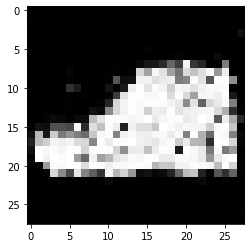

Number batches 78
67(0/78) D: 0.4700, G: 1.4379
67(1/78) D: 0.5257, G: 1.4801
67(2/78) D: 0.5431, G: 1.2633
67(3/78) D: 0.5750, G: 1.2967
67(4/78) D: 0.5050, G: 1.4246
67(5/78) D: 0.5525, G: 1.3450
67(6/78) D: 0.5479, G: 1.0762
67(7/78) D: 0.5535, G: 1.6331
67(8/78) D: 0.5403, G: 1.1875
67(9/78) D: 0.5333, G: 1.4649
67(10/78) D: 0.5724, G: 1.4186
67(11/78) D: 0.5237, G: 1.1528
67(12/78) D: 0.5233, G: 1.4703
67(13/78) D: 0.5395, G: 1.4286
67(14/78) D: 0.5805, G: 1.1123
67(15/78) D: 0.6149, G: 1.1828
67(16/78) D: 0.5168, G: 1.3436
67(17/78) D: 0.5295, G: 1.4717
67(18/78) D: 0.5566, G: 1.2502
67(19/78) D: 0.5369, G: 1.2194
67(20/78) D: 0.5110, G: 1.6741
67(21/78) D: 0.5413, G: 1.4868
67(22/78) D: 0.5573, G: 1.0131
67(23/78) D: 0.5345, G: 1.5938
67(24/78) D: 0.4859, G: 1.5156
67(25/78) D: 0.5164, G: 1.0899
67(26/78) D: 0.5419, G: 1.2933
67(27/78) D: 0.5069, G: 1.3623
67(28/78) D: 0.5450, G: 1.4306
67(29/78) D: 0.5164, G: 1.4171
67(30/78) D: 0.5735, G: 1.7759
67(31/78) D: 0.5310, G: 1.2240


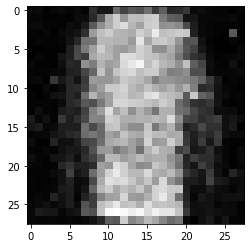

Number batches 78
68(0/78) D: 0.5180, G: 1.2880
68(1/78) D: 0.5312, G: 1.1548
68(2/78) D: 0.5651, G: 1.4237
68(3/78) D: 0.5682, G: 1.2301
68(4/78) D: 0.5438, G: 1.3964
68(5/78) D: 0.5827, G: 1.2150
68(6/78) D: 0.5521, G: 1.0682
68(7/78) D: 0.4944, G: 1.4612
68(8/78) D: 0.4676, G: 1.3202
68(9/78) D: 0.5331, G: 1.0551
68(10/78) D: 0.4709, G: 1.5664
68(11/78) D: 0.5274, G: 1.1258
68(12/78) D: 0.5917, G: 1.8606
68(13/78) D: 0.5523, G: 1.2833
68(14/78) D: 0.5599, G: 0.9057
68(15/78) D: 0.6304, G: 1.6223
68(16/78) D: 0.5502, G: 1.1942
68(17/78) D: 0.5115, G: 1.4344
68(18/78) D: 0.4970, G: 1.3775
68(19/78) D: 0.4972, G: 1.2329
68(20/78) D: 0.5092, G: 1.4543
68(21/78) D: 0.5825, G: 1.3542
68(22/78) D: 0.5564, G: 1.0861
68(23/78) D: 0.5165, G: 1.3190
68(24/78) D: 0.5280, G: 1.6650
68(25/78) D: 0.5524, G: 1.2014
68(26/78) D: 0.5332, G: 1.0844
68(27/78) D: 0.5197, G: 1.6980
68(28/78) D: 0.5901, G: 1.2301
68(29/78) D: 0.5145, G: 1.2035
68(30/78) D: 0.5449, G: 1.3876
68(31/78) D: 0.4718, G: 1.4140


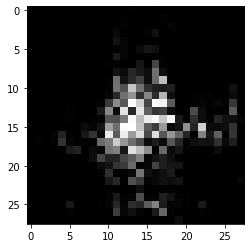

Number batches 78
69(0/78) D: 0.5197, G: 1.6726
69(1/78) D: 0.5594, G: 1.1966
69(2/78) D: 0.5241, G: 1.1977
69(3/78) D: 0.4818, G: 1.3957
69(4/78) D: 0.5247, G: 1.4916
69(5/78) D: 0.5776, G: 1.2406
69(6/78) D: 0.5543, G: 1.1518
69(7/78) D: 0.5164, G: 1.3419
69(8/78) D: 0.5397, G: 1.2365
69(9/78) D: 0.5393, G: 1.4663
69(10/78) D: 0.5283, G: 1.5118
69(11/78) D: 0.5308, G: 1.2459
69(12/78) D: 0.5549, G: 1.5461
69(13/78) D: 0.5314, G: 1.1945
69(14/78) D: 0.5410, G: 1.5240
69(15/78) D: 0.5823, G: 1.3340
69(16/78) D: 0.5373, G: 1.3244
69(17/78) D: 0.5577, G: 1.5034
69(18/78) D: 0.5703, G: 1.0588
69(19/78) D: 0.5425, G: 1.0497
69(20/78) D: 0.5251, G: 1.9323
69(21/78) D: 0.5211, G: 1.0842
69(22/78) D: 0.5857, G: 1.2912
69(23/78) D: 0.5431, G: 1.3496
69(24/78) D: 0.5248, G: 1.6193
69(25/78) D: 0.5217, G: 1.0177
69(26/78) D: 0.5666, G: 1.7314
69(27/78) D: 0.5175, G: 1.2742
69(28/78) D: 0.5212, G: 1.2649
69(29/78) D: 0.5099, G: 1.5323
69(30/78) D: 0.5030, G: 1.2531
69(31/78) D: 0.5109, G: 1.4484


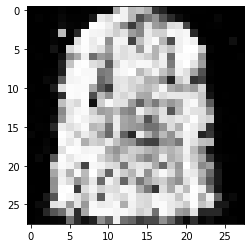

Number batches 78
70(0/78) D: 0.5568, G: 1.5734
70(1/78) D: 0.5129, G: 1.3285
70(2/78) D: 0.5507, G: 1.4749
70(3/78) D: 0.5487, G: 1.3258
70(4/78) D: 0.5101, G: 1.2852
70(5/78) D: 0.5564, G: 1.4181
70(6/78) D: 0.5402, G: 0.8825
70(7/78) D: 0.5945, G: 1.7270
70(8/78) D: 0.5391, G: 1.3928
70(9/78) D: 0.5647, G: 0.9692
70(10/78) D: 0.5525, G: 1.8339
70(11/78) D: 0.5620, G: 1.1360
70(12/78) D: 0.5376, G: 1.5167
70(13/78) D: 0.4734, G: 1.3854
70(14/78) D: 0.5113, G: 1.2460
70(15/78) D: 0.5354, G: 1.3966
70(16/78) D: 0.5792, G: 1.3035
70(17/78) D: 0.5625, G: 1.6415
70(18/78) D: 0.5179, G: 1.0997
70(19/78) D: 0.5174, G: 1.1727
70(20/78) D: 0.5145, G: 1.5944
70(21/78) D: 0.5839, G: 1.1473
70(22/78) D: 0.5851, G: 1.0908
70(23/78) D: 0.5522, G: 1.5756
70(24/78) D: 0.4955, G: 1.4006
70(25/78) D: 0.5520, G: 1.2829
70(26/78) D: 0.5187, G: 1.1420
70(27/78) D: 0.6058, G: 1.3100
70(28/78) D: 0.4580, G: 1.3413
70(29/78) D: 0.4634, G: 1.2892
70(30/78) D: 0.4914, G: 1.3672
70(31/78) D: 0.5468, G: 1.1771


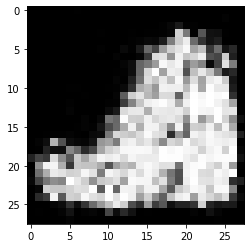

Number batches 78
71(0/78) D: 0.5017, G: 1.3925
71(1/78) D: 0.4720, G: 1.4513
71(2/78) D: 0.5308, G: 1.0773
71(3/78) D: 0.5223, G: 1.4853
71(4/78) D: 0.5331, G: 1.2797
71(5/78) D: 0.5070, G: 1.2385
71(6/78) D: 0.5452, G: 1.3048
71(7/78) D: 0.5336, G: 1.3878
71(8/78) D: 0.4795, G: 1.2498
71(9/78) D: 0.5237, G: 1.1715
71(10/78) D: 0.4839, G: 1.2330
71(11/78) D: 0.5283, G: 1.0675
71(12/78) D: 0.5130, G: 1.4674
71(13/78) D: 0.5197, G: 1.3210
71(14/78) D: 0.5628, G: 1.1446
71(15/78) D: 0.5550, G: 1.3996
71(16/78) D: 0.5591, G: 1.2784
71(17/78) D: 0.5201, G: 1.3665
71(18/78) D: 0.5629, G: 1.2116
71(19/78) D: 0.5368, G: 1.0776
71(20/78) D: 0.5640, G: 1.8394
71(21/78) D: 0.5884, G: 1.2813
71(22/78) D: 0.5607, G: 1.0230
71(23/78) D: 0.4984, G: 1.5596
71(24/78) D: 0.5041, G: 1.3196
71(25/78) D: 0.5006, G: 1.1815
71(26/78) D: 0.5683, G: 1.2531
71(27/78) D: 0.5188, G: 1.1609
71(28/78) D: 0.5323, G: 1.4111
71(29/78) D: 0.5234, G: 1.3288
71(30/78) D: 0.4912, G: 1.3555
71(31/78) D: 0.5006, G: 1.3479


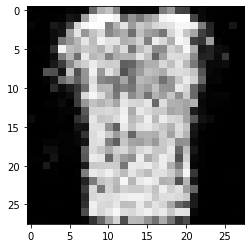

Number batches 78
72(0/78) D: 0.5646, G: 1.5798
72(1/78) D: 0.5499, G: 1.3397
72(2/78) D: 0.5400, G: 1.0975
72(3/78) D: 0.5203, G: 1.2994
72(4/78) D: 0.5374, G: 1.3961
72(5/78) D: 0.4936, G: 1.2522
72(6/78) D: 0.5422, G: 1.2922
72(7/78) D: 0.5569, G: 1.7038
72(8/78) D: 0.5409, G: 0.9325
72(9/78) D: 0.5375, G: 1.5028
72(10/78) D: 0.5539, G: 1.4413
72(11/78) D: 0.5211, G: 0.9737
72(12/78) D: 0.5822, G: 2.0076
72(13/78) D: 0.5679, G: 1.2224
72(14/78) D: 0.5280, G: 0.9598
72(15/78) D: 0.5460, G: 1.7713
72(16/78) D: 0.5910, G: 1.1930
72(17/78) D: 0.4797, G: 1.2246
72(18/78) D: 0.5561, G: 1.4586
72(19/78) D: 0.5323, G: 1.1473
72(20/78) D: 0.5143, G: 1.5365
72(21/78) D: 0.5215, G: 1.1755
72(22/78) D: 0.5425, G: 1.2997
72(23/78) D: 0.5355, G: 1.4228
72(24/78) D: 0.5276, G: 1.5464
72(25/78) D: 0.5326, G: 1.1636
72(26/78) D: 0.5177, G: 1.2991
72(27/78) D: 0.5098, G: 1.3659
72(28/78) D: 0.5161, G: 1.5671
72(29/78) D: 0.5466, G: 1.0636
72(30/78) D: 0.4939, G: 1.6282
72(31/78) D: 0.5376, G: 1.2139


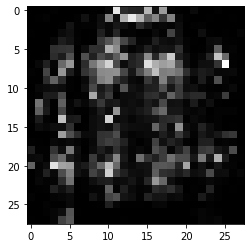

Number batches 78
73(0/78) D: 0.5641, G: 1.3400
73(1/78) D: 0.5516, G: 1.2045
73(2/78) D: 0.5573, G: 1.3863
73(3/78) D: 0.5154, G: 1.2639
73(4/78) D: 0.5119, G: 1.2769
73(5/78) D: 0.5479, G: 1.4458
73(6/78) D: 0.5583, G: 1.2620
73(7/78) D: 0.5107, G: 1.1262
73(8/78) D: 0.4988, G: 1.3130
73(9/78) D: 0.4868, G: 1.4264
73(10/78) D: 0.5136, G: 1.2072
73(11/78) D: 0.5496, G: 1.4004
73(12/78) D: 0.5270, G: 1.4702
73(13/78) D: 0.5486, G: 1.5397
73(14/78) D: 0.5471, G: 1.1454
73(15/78) D: 0.6120, G: 1.6310
73(16/78) D: 0.6150, G: 1.0376
73(17/78) D: 0.5682, G: 1.3764
73(18/78) D: 0.5251, G: 1.1665
73(19/78) D: 0.5706, G: 1.0701
73(20/78) D: 0.5540, G: 1.6562
73(21/78) D: 0.5709, G: 1.2278
73(22/78) D: 0.5568, G: 1.0036
73(23/78) D: 0.5978, G: 1.5192
73(24/78) D: 0.5439, G: 1.2537
73(25/78) D: 0.5550, G: 1.2008
73(26/78) D: 0.5698, G: 1.2057
73(27/78) D: 0.5579, G: 1.1210
73(28/78) D: 0.5481, G: 1.4123
73(29/78) D: 0.4987, G: 1.5152
73(30/78) D: 0.5901, G: 1.2601
73(31/78) D: 0.5426, G: 1.1159


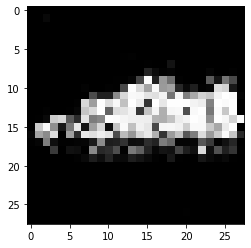

Number batches 78
74(0/78) D: 0.5500, G: 1.3077
74(1/78) D: 0.5341, G: 1.3160
74(2/78) D: 0.5421, G: 1.2374
74(3/78) D: 0.5819, G: 1.2950
74(4/78) D: 0.5179, G: 1.4910
74(5/78) D: 0.5560, G: 1.2369
74(6/78) D: 0.5285, G: 0.9985
74(7/78) D: 0.5126, G: 1.5913
74(8/78) D: 0.5523, G: 1.1789
74(9/78) D: 0.5634, G: 1.1624
74(10/78) D: 0.5564, G: 1.3893
74(11/78) D: 0.5436, G: 1.1417
74(12/78) D: 0.5809, G: 1.5138
74(13/78) D: 0.5023, G: 1.4065
74(14/78) D: 0.5588, G: 1.2380
74(15/78) D: 0.5334, G: 1.5147
74(16/78) D: 0.6097, G: 1.2347
74(17/78) D: 0.5177, G: 1.4505
74(18/78) D: 0.6072, G: 0.9991
74(19/78) D: 0.5548, G: 1.1606
74(20/78) D: 0.5408, G: 1.4849
74(21/78) D: 0.5401, G: 1.3329
74(22/78) D: 0.5700, G: 1.1467
74(23/78) D: 0.5359, G: 1.4253
74(24/78) D: 0.4802, G: 1.4432
74(25/78) D: 0.5070, G: 1.1377
74(26/78) D: 0.5852, G: 1.5958
74(27/78) D: 0.5353, G: 1.1768
74(28/78) D: 0.4489, G: 1.2725
74(29/78) D: 0.5038, G: 1.2687
74(30/78) D: 0.5149, G: 1.4898
74(31/78) D: 0.5322, G: 1.3069


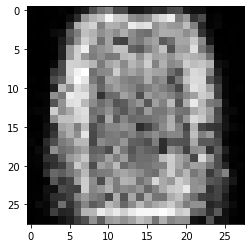

Number batches 78
75(0/78) D: 0.5078, G: 1.1726
75(1/78) D: 0.5134, G: 1.3791
75(2/78) D: 0.5007, G: 1.2325
75(3/78) D: 0.5526, G: 1.0651
75(4/78) D: 0.5630, G: 1.4384
75(5/78) D: 0.5815, G: 1.3307
75(6/78) D: 0.5698, G: 1.1099
75(7/78) D: 0.5148, G: 1.2308
75(8/78) D: 0.5641, G: 1.4031
75(9/78) D: 0.5249, G: 1.1548
75(10/78) D: 0.5416, G: 1.1558
75(11/78) D: 0.5938, G: 1.4344
75(12/78) D: 0.5624, G: 1.2890
75(13/78) D: 0.4727, G: 1.2973
75(14/78) D: 0.5543, G: 1.2150
75(15/78) D: 0.5887, G: 1.1474
75(16/78) D: 0.5279, G: 1.3414
75(17/78) D: 0.5265, G: 1.5737
75(18/78) D: 0.5712, G: 1.0810
75(19/78) D: 0.5958, G: 1.3003
75(20/78) D: 0.5564, G: 1.4779
75(21/78) D: 0.5671, G: 1.1787
75(22/78) D: 0.5854, G: 1.3457
75(23/78) D: 0.5405, G: 1.5060
75(24/78) D: 0.5082, G: 1.2260
75(25/78) D: 0.5673, G: 1.2476
75(26/78) D: 0.5359, G: 1.3527
75(27/78) D: 0.6140, G: 1.1965
75(28/78) D: 0.5166, G: 1.1820
75(29/78) D: 0.5620, G: 1.2764
75(30/78) D: 0.5516, G: 1.5109
75(31/78) D: 0.5211, G: 1.2600


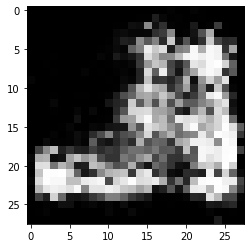

Number batches 78
76(0/78) D: 0.5936, G: 1.1715
76(1/78) D: 0.5289, G: 1.2895
76(2/78) D: 0.6015, G: 1.1429
76(3/78) D: 0.5455, G: 1.4352
76(4/78) D: 0.5422, G: 1.2243
76(5/78) D: 0.4922, G: 1.1117
76(6/78) D: 0.5587, G: 1.2205
76(7/78) D: 0.5149, G: 1.2958
76(8/78) D: 0.6039, G: 1.5212
76(9/78) D: 0.5370, G: 1.0059
76(10/78) D: 0.5969, G: 1.5993
76(11/78) D: 0.5862, G: 1.2275
76(12/78) D: 0.5723, G: 1.4015
76(13/78) D: 0.5078, G: 1.0135
76(14/78) D: 0.6376, G: 1.4075
76(15/78) D: 0.6195, G: 1.3281
76(16/78) D: 0.5607, G: 0.9853
76(17/78) D: 0.5440, G: 1.2685
76(18/78) D: 0.5657, G: 1.1848
76(19/78) D: 0.5929, G: 1.3349
76(20/78) D: 0.5464, G: 1.4006
76(21/78) D: 0.5431, G: 1.2336
76(22/78) D: 0.5203, G: 0.8723
76(23/78) D: 0.6116, G: 1.6738
76(24/78) D: 0.5213, G: 1.0888
76(25/78) D: 0.5450, G: 0.9968
76(26/78) D: 0.5624, G: 1.4812
76(27/78) D: 0.6033, G: 1.1580
76(28/78) D: 0.5256, G: 1.2764
76(29/78) D: 0.5477, G: 1.2529
76(30/78) D: 0.5756, G: 1.1395
76(31/78) D: 0.5517, G: 1.2147


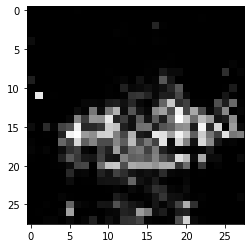

Number batches 78
77(0/78) D: 0.5514, G: 1.1005
77(1/78) D: 0.5793, G: 1.3788
77(2/78) D: 0.5668, G: 1.1380
77(3/78) D: 0.5884, G: 1.2475
77(4/78) D: 0.5026, G: 1.3927
77(5/78) D: 0.4829, G: 1.1242
77(6/78) D: 0.5827, G: 1.0328
77(7/78) D: 0.5199, G: 1.6181
77(8/78) D: 0.5592, G: 1.1390
77(9/78) D: 0.5485, G: 1.3450
77(10/78) D: 0.5207, G: 1.2630
77(11/78) D: 0.5783, G: 1.1311
77(12/78) D: 0.5440, G: 1.5131
77(13/78) D: 0.5209, G: 1.3344
77(14/78) D: 0.5407, G: 1.1648
77(15/78) D: 0.6264, G: 1.5516
77(16/78) D: 0.5430, G: 0.9720
77(17/78) D: 0.5605, G: 1.4802
77(18/78) D: 0.5571, G: 1.2536
77(19/78) D: 0.5533, G: 1.1890
77(20/78) D: 0.4989, G: 1.4257
77(21/78) D: 0.4727, G: 1.2314
77(22/78) D: 0.6008, G: 1.2713
77(23/78) D: 0.5688, G: 1.4977
77(24/78) D: 0.5455, G: 1.6564
77(25/78) D: 0.5966, G: 1.0828
77(26/78) D: 0.6284, G: 1.4251
77(27/78) D: 0.5550, G: 1.3487
77(28/78) D: 0.5513, G: 1.3148
77(29/78) D: 0.5526, G: 1.1422
77(30/78) D: 0.5426, G: 1.2447
77(31/78) D: 0.5578, G: 1.3160


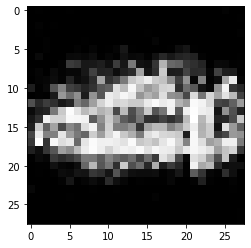

Number batches 78
78(0/78) D: 0.5376, G: 1.0488
78(1/78) D: 0.5018, G: 1.3141
78(2/78) D: 0.5520, G: 1.3069
78(3/78) D: 0.5502, G: 1.0855
78(4/78) D: 0.5314, G: 1.3968
78(5/78) D: 0.5368, G: 1.2706
78(6/78) D: 0.5558, G: 1.1849
78(7/78) D: 0.5118, G: 1.4590
78(8/78) D: 0.5196, G: 1.1014
78(9/78) D: 0.5449, G: 1.5420
78(10/78) D: 0.5056, G: 1.1672
78(11/78) D: 0.5510, G: 1.1552
78(12/78) D: 0.5379, G: 1.4374
78(13/78) D: 0.4928, G: 1.4431
78(14/78) D: 0.5701, G: 1.2411
78(15/78) D: 0.5312, G: 1.3223
78(16/78) D: 0.5455, G: 1.2812
78(17/78) D: 0.5348, G: 1.4072
78(18/78) D: 0.4904, G: 1.3214
78(19/78) D: 0.5006, G: 1.2072
78(20/78) D: 0.5206, G: 1.6049
78(21/78) D: 0.5667, G: 1.1922
78(22/78) D: 0.5071, G: 0.9000
78(23/78) D: 0.5917, G: 1.7116
78(24/78) D: 0.5286, G: 1.2923
78(25/78) D: 0.5123, G: 1.0555
78(26/78) D: 0.5240, G: 1.4906
78(27/78) D: 0.5685, G: 1.0936
78(28/78) D: 0.5504, G: 1.2050
78(29/78) D: 0.5116, G: 1.4362
78(30/78) D: 0.5369, G: 1.2638
78(31/78) D: 0.5139, G: 1.1577


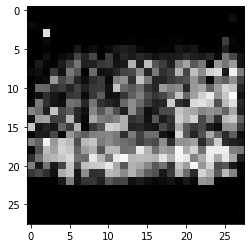

Number batches 78
79(0/78) D: 0.5809, G: 1.0103
79(1/78) D: 0.5359, G: 1.4607
79(2/78) D: 0.6129, G: 1.2558
79(3/78) D: 0.5521, G: 1.5274
79(4/78) D: 0.4852, G: 1.1916
79(5/78) D: 0.6282, G: 1.3248
79(6/78) D: 0.5721, G: 1.1594
79(7/78) D: 0.5368, G: 1.3066
79(8/78) D: 0.5143, G: 1.2931
79(9/78) D: 0.5493, G: 1.1838
79(10/78) D: 0.5433, G: 1.4728
79(11/78) D: 0.5662, G: 1.1188
79(12/78) D: 0.5891, G: 1.5940
79(13/78) D: 0.5514, G: 0.9740
79(14/78) D: 0.6120, G: 1.3160
79(15/78) D: 0.5757, G: 1.2098
79(16/78) D: 0.5345, G: 1.2092
79(17/78) D: 0.5470, G: 1.4458
79(18/78) D: 0.5679, G: 1.1057
79(19/78) D: 0.5455, G: 1.1890
79(20/78) D: 0.5521, G: 1.7955
79(21/78) D: 0.5453, G: 1.2145
79(22/78) D: 0.5661, G: 1.1453
79(23/78) D: 0.4535, G: 1.2456
79(24/78) D: 0.4934, G: 1.5827
79(25/78) D: 0.5205, G: 1.0724
79(26/78) D: 0.5366, G: 1.7889
79(27/78) D: 0.5604, G: 1.2646
79(28/78) D: 0.4666, G: 1.3092
79(29/78) D: 0.4965, G: 1.2066
79(30/78) D: 0.5479, G: 1.5050
79(31/78) D: 0.5699, G: 1.4090


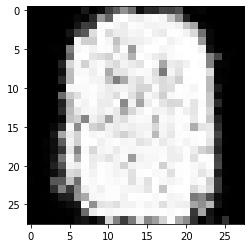

Number batches 78
80(0/78) D: 0.6243, G: 1.2061
80(1/78) D: 0.6064, G: 1.2817
80(2/78) D: 0.5871, G: 1.1066
80(3/78) D: 0.5768, G: 1.3125
80(4/78) D: 0.5149, G: 1.3124
80(5/78) D: 0.5433, G: 1.1101
80(6/78) D: 0.5541, G: 0.9847
80(7/78) D: 0.5446, G: 1.2199
80(8/78) D: 0.4991, G: 1.4525
80(9/78) D: 0.5143, G: 1.4133
80(10/78) D: 0.5744, G: 1.3458
80(11/78) D: 0.5943, G: 1.3950
80(12/78) D: 0.5327, G: 1.2448
80(13/78) D: 0.5327, G: 1.2814
80(14/78) D: 0.5296, G: 1.3433
80(15/78) D: 0.5010, G: 1.2520
80(16/78) D: 0.5533, G: 1.1547
80(17/78) D: 0.5750, G: 1.4539
80(18/78) D: 0.5746, G: 1.0210
80(19/78) D: 0.5947, G: 1.4172
80(20/78) D: 0.5634, G: 1.2470
80(21/78) D: 0.4966, G: 1.1916
80(22/78) D: 0.5621, G: 1.2650
80(23/78) D: 0.5242, G: 1.2994
80(24/78) D: 0.4656, G: 1.1856
80(25/78) D: 0.5403, G: 1.3002
80(26/78) D: 0.5255, G: 1.1682
80(27/78) D: 0.5339, G: 1.1110
80(28/78) D: 0.4985, G: 1.1774
80(29/78) D: 0.5684, G: 1.2877
80(30/78) D: 0.6155, G: 1.4022
80(31/78) D: 0.5395, G: 1.1136


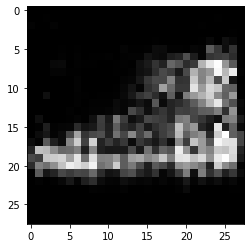

Number batches 78
81(0/78) D: 0.5311, G: 1.3151
81(1/78) D: 0.5059, G: 1.3760
81(2/78) D: 0.5644, G: 1.0719
81(3/78) D: 0.5278, G: 1.6304
81(4/78) D: 0.5195, G: 1.2490
81(5/78) D: 0.5269, G: 1.2816
81(6/78) D: 0.5236, G: 1.1825
81(7/78) D: 0.5283, G: 1.2247
81(8/78) D: 0.5083, G: 1.1591
81(9/78) D: 0.5527, G: 1.0530
81(10/78) D: 0.5134, G: 1.4361
81(11/78) D: 0.5379, G: 1.1836
81(12/78) D: 0.4864, G: 1.4137
81(13/78) D: 0.4872, G: 1.3196
81(14/78) D: 0.5463, G: 1.1973
81(15/78) D: 0.6082, G: 1.6545
81(16/78) D: 0.5874, G: 0.9981
81(17/78) D: 0.6012, G: 1.2784
81(18/78) D: 0.5819, G: 1.1817
81(19/78) D: 0.5940, G: 1.2954
81(20/78) D: 0.5294, G: 1.3293
81(21/78) D: 0.5432, G: 1.0261
81(22/78) D: 0.5613, G: 1.1412
81(23/78) D: 0.5032, G: 1.1762
81(24/78) D: 0.4424, G: 1.3181
81(25/78) D: 0.5769, G: 1.1923
81(26/78) D: 0.5879, G: 1.2795
81(27/78) D: 0.5565, G: 1.2282
81(28/78) D: 0.5673, G: 1.4554
81(29/78) D: 0.5563, G: 1.0941
81(30/78) D: 0.5782, G: 1.2105
81(31/78) D: 0.5264, G: 1.3580


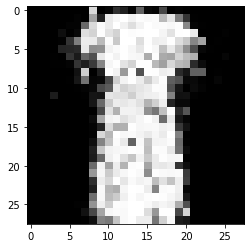

Number batches 78
82(0/78) D: 0.5172, G: 1.1557
82(1/78) D: 0.5222, G: 1.3859
82(2/78) D: 0.5588, G: 1.2399
82(3/78) D: 0.5839, G: 1.2623
82(4/78) D: 0.5152, G: 1.2074
82(5/78) D: 0.5538, G: 1.3145
82(6/78) D: 0.5812, G: 1.0585
82(7/78) D: 0.5381, G: 1.4386
82(8/78) D: 0.5384, G: 1.1836
82(9/78) D: 0.5583, G: 1.1826
82(10/78) D: 0.5457, G: 1.5249
82(11/78) D: 0.5639, G: 0.9558
82(12/78) D: 0.6021, G: 1.5353
82(13/78) D: 0.5514, G: 1.2526
82(14/78) D: 0.5592, G: 0.8722
82(15/78) D: 0.5596, G: 1.3082
82(16/78) D: 0.5686, G: 1.3316
82(17/78) D: 0.5765, G: 0.9999
82(18/78) D: 0.5721, G: 1.5982
82(19/78) D: 0.5210, G: 1.2227
82(20/78) D: 0.4997, G: 1.3897
82(21/78) D: 0.6094, G: 1.2620
82(22/78) D: 0.4986, G: 0.9674
82(23/78) D: 0.5340, G: 1.3542
82(24/78) D: 0.4936, G: 1.4073
82(25/78) D: 0.4776, G: 1.1976
82(26/78) D: 0.5279, G: 1.3355
82(27/78) D: 0.5784, G: 1.1934
82(28/78) D: 0.5301, G: 1.4162
82(29/78) D: 0.5956, G: 1.1986
82(30/78) D: 0.6291, G: 1.2294
82(31/78) D: 0.6625, G: 0.9269


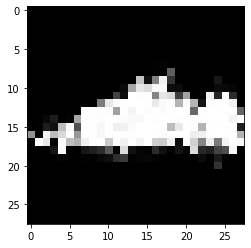

Number batches 78
83(0/78) D: 0.5214, G: 1.2989
83(1/78) D: 0.5535, G: 1.1369
83(2/78) D: 0.5416, G: 1.2592
83(3/78) D: 0.4954, G: 1.3017
83(4/78) D: 0.4780, G: 1.2423
83(5/78) D: 0.5359, G: 1.3716
83(6/78) D: 0.5704, G: 1.1456
83(7/78) D: 0.5359, G: 1.1517
83(8/78) D: 0.4970, G: 1.4674
83(9/78) D: 0.5603, G: 1.1628
83(10/78) D: 0.5538, G: 1.4251
83(11/78) D: 0.5475, G: 1.2036
83(12/78) D: 0.5241, G: 1.1170
83(13/78) D: 0.5257, G: 1.4473
83(14/78) D: 0.6411, G: 1.0591
83(15/78) D: 0.5749, G: 1.0794
83(16/78) D: 0.5660, G: 1.2597
83(17/78) D: 0.5607, G: 1.3872
83(18/78) D: 0.5567, G: 1.1896
83(19/78) D: 0.5865, G: 1.1695
83(20/78) D: 0.5028, G: 1.3600
83(21/78) D: 0.5413, G: 1.0321
83(22/78) D: 0.6361, G: 1.2117
83(23/78) D: 0.5472, G: 1.3002
83(24/78) D: 0.5541, G: 1.3158
83(25/78) D: 0.5369, G: 1.1897
83(26/78) D: 0.5374, G: 1.2567
83(27/78) D: 0.5164, G: 1.1374
83(28/78) D: 0.5017, G: 1.1826
83(29/78) D: 0.5441, G: 1.2887
83(30/78) D: 0.5483, G: 1.3364
83(31/78) D: 0.5516, G: 1.2368


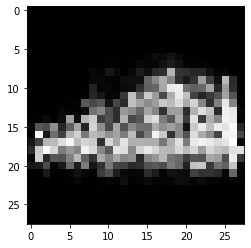

Number batches 78
84(0/78) D: 0.5473, G: 1.1994
84(1/78) D: 0.4782, G: 1.5420
84(2/78) D: 0.5813, G: 1.2388
84(3/78) D: 0.5265, G: 1.0663
84(4/78) D: 0.5771, G: 1.4121
84(5/78) D: 0.5498, G: 1.2967
84(6/78) D: 0.5491, G: 1.0749
84(7/78) D: 0.5122, G: 1.3394
84(8/78) D: 0.4843, G: 1.3563
84(9/78) D: 0.5255, G: 0.9557
84(10/78) D: 0.5582, G: 1.7101
84(11/78) D: 0.5897, G: 1.0319
84(12/78) D: 0.5391, G: 1.2078
84(13/78) D: 0.5278, G: 1.4117
84(14/78) D: 0.5361, G: 1.2914
84(15/78) D: 0.5502, G: 1.2173
84(16/78) D: 0.6051, G: 1.2380
84(17/78) D: 0.5635, G: 1.3171
84(18/78) D: 0.5821, G: 1.0934
84(19/78) D: 0.6277, G: 1.3194
84(20/78) D: 0.5752, G: 1.1258
84(21/78) D: 0.5707, G: 1.3739
84(22/78) D: 0.5460, G: 1.0247
84(23/78) D: 0.5377, G: 1.4280
84(24/78) D: 0.4941, G: 1.4482
84(25/78) D: 0.5275, G: 1.2916
84(26/78) D: 0.6107, G: 0.9747
84(27/78) D: 0.5814, G: 1.3569
84(28/78) D: 0.5057, G: 1.3118
84(29/78) D: 0.5515, G: 1.1261
84(30/78) D: 0.5299, G: 1.5536
84(31/78) D: 0.5225, G: 1.2319


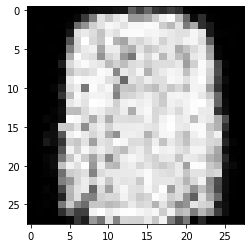

Number batches 78
85(0/78) D: 0.5364, G: 1.1835
85(1/78) D: 0.5180, G: 1.4103
85(2/78) D: 0.5338, G: 1.1968
85(3/78) D: 0.5384, G: 1.0335
85(4/78) D: 0.5421, G: 1.6210
85(5/78) D: 0.6144, G: 1.0443
85(6/78) D: 0.5634, G: 1.0137
85(7/78) D: 0.5818, G: 1.7592
85(8/78) D: 0.5849, G: 1.0643
85(9/78) D: 0.5117, G: 1.0631
85(10/78) D: 0.5809, G: 1.6148
85(11/78) D: 0.5796, G: 1.1981
85(12/78) D: 0.5418, G: 1.1549
85(13/78) D: 0.5888, G: 1.2362
85(14/78) D: 0.5317, G: 1.4334
85(15/78) D: 0.5661, G: 1.1536
85(16/78) D: 0.5357, G: 1.2053
85(17/78) D: 0.5553, G: 1.1644
85(18/78) D: 0.5657, G: 1.2137
85(19/78) D: 0.5719, G: 1.1744
85(20/78) D: 0.5105, G: 1.1150
85(21/78) D: 0.5792, G: 1.2431
85(22/78) D: 0.5447, G: 1.1938
85(23/78) D: 0.5438, G: 1.2285
85(24/78) D: 0.5163, G: 1.4610
85(25/78) D: 0.5472, G: 1.1225
85(26/78) D: 0.5976, G: 1.1108
85(27/78) D: 0.6255, G: 1.3493
85(28/78) D: 0.5625, G: 1.1665
85(29/78) D: 0.5136, G: 1.1735
85(30/78) D: 0.5246, G: 1.2179
85(31/78) D: 0.5747, G: 1.2877


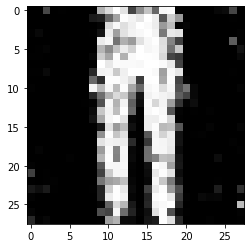

Number batches 78
86(0/78) D: 0.5748, G: 1.0706
86(1/78) D: 0.5886, G: 1.2968
86(2/78) D: 0.5409, G: 1.1590
86(3/78) D: 0.5470, G: 0.8797
86(4/78) D: 0.5807, G: 1.3624
86(5/78) D: 0.5446, G: 1.1541
86(6/78) D: 0.5221, G: 1.0703
86(7/78) D: 0.5303, G: 1.3747
86(8/78) D: 0.5352, G: 1.3206
86(9/78) D: 0.5259, G: 1.1800
86(10/78) D: 0.5621, G: 1.6453
86(11/78) D: 0.5111, G: 1.1467
86(12/78) D: 0.5781, G: 1.5737
86(13/78) D: 0.5380, G: 1.2725
86(14/78) D: 0.5683, G: 1.0912
86(15/78) D: 0.5409, G: 1.2726
86(16/78) D: 0.4965, G: 1.3831
86(17/78) D: 0.5322, G: 1.3141
86(18/78) D: 0.5236, G: 1.2341
86(19/78) D: 0.5724, G: 1.1258
86(20/78) D: 0.4926, G: 1.2920
86(21/78) D: 0.5613, G: 1.3087
86(22/78) D: 0.5823, G: 1.2819
86(23/78) D: 0.5659, G: 1.2524
86(24/78) D: 0.5124, G: 1.4796
86(25/78) D: 0.5504, G: 1.3246
86(26/78) D: 0.5531, G: 1.0336
86(27/78) D: 0.5866, G: 1.3685
86(28/78) D: 0.5570, G: 1.1718
86(29/78) D: 0.5433, G: 1.1714
86(30/78) D: 0.5691, G: 1.2220
86(31/78) D: 0.5388, G: 1.2595


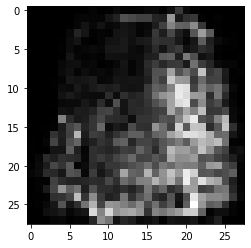

Number batches 78
87(0/78) D: 0.5317, G: 1.3333
87(1/78) D: 0.5489, G: 1.3853
87(2/78) D: 0.5882, G: 0.8819
87(3/78) D: 0.6119, G: 1.3934
87(4/78) D: 0.6258, G: 1.2344
87(5/78) D: 0.5432, G: 1.0813
87(6/78) D: 0.5549, G: 1.1389
87(7/78) D: 0.5470, G: 1.2436
87(8/78) D: 0.5224, G: 1.2644
87(9/78) D: 0.5248, G: 1.2034
87(10/78) D: 0.5256, G: 1.2728
87(11/78) D: 0.5751, G: 1.2076
87(12/78) D: 0.5421, G: 1.1757
87(13/78) D: 0.5593, G: 1.4501
87(14/78) D: 0.5840, G: 1.0332
87(15/78) D: 0.5910, G: 1.2528
87(16/78) D: 0.5405, G: 1.2811
87(17/78) D: 0.5476, G: 1.1906
87(18/78) D: 0.5276, G: 1.1716
87(19/78) D: 0.5791, G: 1.1117
87(20/78) D: 0.5730, G: 1.5378
87(21/78) D: 0.5683, G: 1.3252
87(22/78) D: 0.5756, G: 1.0330
87(23/78) D: 0.5453, G: 1.5006
87(24/78) D: 0.4800, G: 1.1541
87(25/78) D: 0.5825, G: 1.0814
87(26/78) D: 0.5672, G: 1.3278
87(27/78) D: 0.5656, G: 1.1387
87(28/78) D: 0.5552, G: 1.3600
87(29/78) D: 0.5464, G: 1.2753
87(30/78) D: 0.5213, G: 1.2791
87(31/78) D: 0.5679, G: 1.1312


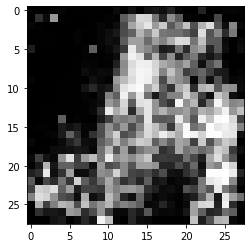

Number batches 78
88(0/78) D: 0.5825, G: 1.3010
88(1/78) D: 0.5276, G: 1.0642
88(2/78) D: 0.6042, G: 1.5068
88(3/78) D: 0.5923, G: 1.1677
88(4/78) D: 0.5447, G: 1.2785
88(5/78) D: 0.5432, G: 1.1690
88(6/78) D: 0.5438, G: 1.1163
88(7/78) D: 0.4934, G: 1.2163
88(8/78) D: 0.5974, G: 1.6406
88(9/78) D: 0.5231, G: 0.9406
88(10/78) D: 0.5764, G: 1.1431
88(11/78) D: 0.5718, G: 1.4791
88(12/78) D: 0.5246, G: 1.1604
88(13/78) D: 0.5782, G: 1.2007
88(14/78) D: 0.6405, G: 1.3564
88(15/78) D: 0.5659, G: 1.1214
88(16/78) D: 0.5586, G: 1.0914
88(17/78) D: 0.4943, G: 1.4154
88(18/78) D: 0.5684, G: 1.1754
88(19/78) D: 0.5784, G: 1.1982
88(20/78) D: 0.5818, G: 1.3455
88(21/78) D: 0.6151, G: 1.0064
88(22/78) D: 0.5983, G: 1.1569
88(23/78) D: 0.5874, G: 1.5246
88(24/78) D: 0.6112, G: 1.1165
88(25/78) D: 0.5804, G: 1.3625
88(26/78) D: 0.5535, G: 1.2011
88(27/78) D: 0.6429, G: 1.3215
88(28/78) D: 0.5414, G: 1.2401
88(29/78) D: 0.5954, G: 1.3772
88(30/78) D: 0.6164, G: 1.0623
88(31/78) D: 0.5513, G: 1.0750


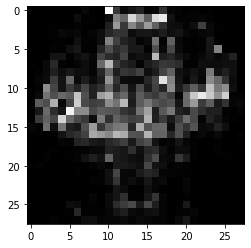

Number batches 78
89(0/78) D: 0.5326, G: 1.2304
89(1/78) D: 0.5296, G: 1.2190
89(2/78) D: 0.5849, G: 0.9986
89(3/78) D: 0.5716, G: 1.2848
89(4/78) D: 0.5335, G: 1.3683
89(5/78) D: 0.6126, G: 1.1056
89(6/78) D: 0.5938, G: 1.4876
89(7/78) D: 0.6062, G: 1.0590
89(8/78) D: 0.6108, G: 1.3041
89(9/78) D: 0.5679, G: 1.0266
89(10/78) D: 0.5318, G: 1.0115
89(11/78) D: 0.5047, G: 1.1701
89(12/78) D: 0.4965, G: 1.2811
89(13/78) D: 0.5147, G: 1.2080
89(14/78) D: 0.5470, G: 1.2021
89(15/78) D: 0.6005, G: 1.2275
89(16/78) D: 0.6006, G: 1.2280
89(17/78) D: 0.5603, G: 1.3748
89(18/78) D: 0.5828, G: 0.8808
89(19/78) D: 0.5741, G: 1.2503
89(20/78) D: 0.5526, G: 1.4824
89(21/78) D: 0.5686, G: 1.1573
89(22/78) D: 0.5578, G: 1.0852
89(23/78) D: 0.5442, G: 1.2172
89(24/78) D: 0.5084, G: 1.4951
89(25/78) D: 0.6300, G: 1.0647
89(26/78) D: 0.5993, G: 1.3007
89(27/78) D: 0.5983, G: 1.1174
89(28/78) D: 0.5287, G: 1.2493
89(29/78) D: 0.5990, G: 1.1719
89(30/78) D: 0.6079, G: 1.3004
89(31/78) D: 0.5398, G: 1.1584


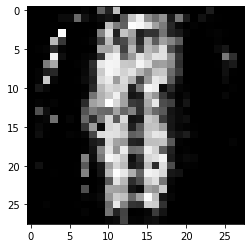

Number batches 78
90(0/78) D: 0.5177, G: 1.3950
90(1/78) D: 0.5167, G: 1.1576
90(2/78) D: 0.4993, G: 1.1292
90(3/78) D: 0.5698, G: 1.1521
90(4/78) D: 0.5655, G: 1.4821
90(5/78) D: 0.5532, G: 1.0929
90(6/78) D: 0.5750, G: 1.5321
90(7/78) D: 0.5546, G: 0.9521
90(8/78) D: 0.5688, G: 1.2115
90(9/78) D: 0.5776, G: 1.4135
90(10/78) D: 0.5230, G: 1.0814
90(11/78) D: 0.5459, G: 1.1941
90(12/78) D: 0.6070, G: 1.7183
90(13/78) D: 0.5793, G: 1.1049
90(14/78) D: 0.5822, G: 1.3686
90(15/78) D: 0.5867, G: 1.3334
90(16/78) D: 0.5853, G: 1.1342
90(17/78) D: 0.5373, G: 1.3091
90(18/78) D: 0.5676, G: 1.1026
90(19/78) D: 0.5855, G: 1.2009
90(20/78) D: 0.5743, G: 1.1533
90(21/78) D: 0.5935, G: 1.0781
90(22/78) D: 0.5729, G: 1.0508
90(23/78) D: 0.6005, G: 1.4379
90(24/78) D: 0.5606, G: 1.2663
90(25/78) D: 0.5654, G: 1.0949
90(26/78) D: 0.5905, G: 1.2889
90(27/78) D: 0.5624, G: 1.1785
90(28/78) D: 0.5813, G: 1.2652
90(29/78) D: 0.5682, G: 1.1369
90(30/78) D: 0.5456, G: 1.3353
90(31/78) D: 0.5677, G: 1.2664


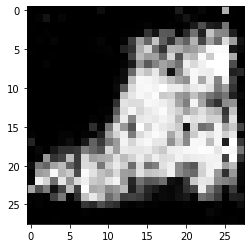

Number batches 78
91(0/78) D: 0.5491, G: 1.0903
91(1/78) D: 0.6256, G: 1.2861
91(2/78) D: 0.5648, G: 1.1110
91(3/78) D: 0.5275, G: 1.1716
91(4/78) D: 0.5234, G: 1.3694
91(5/78) D: 0.6038, G: 1.0891
91(6/78) D: 0.5830, G: 1.0203
91(7/78) D: 0.5423, G: 1.2544
91(8/78) D: 0.5168, G: 1.2779
91(9/78) D: 0.5213, G: 1.1568
91(10/78) D: 0.5752, G: 1.4600
91(11/78) D: 0.5219, G: 1.2466
91(12/78) D: 0.5774, G: 1.3005
91(13/78) D: 0.5095, G: 1.1715
91(14/78) D: 0.5214, G: 1.3904
91(15/78) D: 0.5311, G: 1.1385
91(16/78) D: 0.5206, G: 1.1880
91(17/78) D: 0.5297, G: 1.3694
91(18/78) D: 0.5534, G: 1.1814
91(19/78) D: 0.5129, G: 1.1763
91(20/78) D: 0.5526, G: 1.5206
91(21/78) D: 0.5314, G: 1.1484
91(22/78) D: 0.5776, G: 1.1772
91(23/78) D: 0.5836, G: 1.5591
91(24/78) D: 0.5624, G: 1.3591
91(25/78) D: 0.5204, G: 1.0149
91(26/78) D: 0.5659, G: 1.5796
91(27/78) D: 0.6452, G: 1.0481
91(28/78) D: 0.5434, G: 1.2705
91(29/78) D: 0.6025, G: 1.4163
91(30/78) D: 0.5571, G: 1.1880
91(31/78) D: 0.5323, G: 1.0182


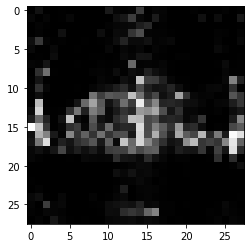

Number batches 78
92(0/78) D: 0.5691, G: 1.2352
92(1/78) D: 0.5964, G: 1.2262
92(2/78) D: 0.5962, G: 1.2257
92(3/78) D: 0.6027, G: 1.0816
92(4/78) D: 0.5501, G: 1.1645
92(5/78) D: 0.5494, G: 1.2093
92(6/78) D: 0.5845, G: 1.0232
92(7/78) D: 0.5476, G: 1.2539
92(8/78) D: 0.5323, G: 1.1439
92(9/78) D: 0.5993, G: 1.3050
92(10/78) D: 0.5237, G: 1.1532
92(11/78) D: 0.5231, G: 1.1673
92(12/78) D: 0.5196, G: 1.3092
92(13/78) D: 0.5163, G: 1.0471
92(14/78) D: 0.5675, G: 1.2082
92(15/78) D: 0.5453, G: 1.0945
92(16/78) D: 0.5402, G: 1.0995
92(17/78) D: 0.4868, G: 1.3940
92(18/78) D: 0.5378, G: 1.2142
92(19/78) D: 0.5847, G: 1.1413
92(20/78) D: 0.5637, G: 1.1350
92(21/78) D: 0.5496, G: 1.1901
92(22/78) D: 0.5481, G: 1.2406
92(23/78) D: 0.5875, G: 1.3133
92(24/78) D: 0.4980, G: 1.0301
92(25/78) D: 0.5553, G: 1.2046
92(26/78) D: 0.5449, G: 1.2200
92(27/78) D: 0.5399, G: 1.2032
92(28/78) D: 0.5891, G: 1.2405
92(29/78) D: 0.5473, G: 1.5153
92(30/78) D: 0.6073, G: 1.0610
92(31/78) D: 0.5595, G: 1.2774


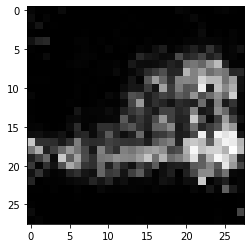

Number batches 78
93(0/78) D: 0.5676, G: 1.1496
93(1/78) D: 0.5546, G: 1.1974
93(2/78) D: 0.5824, G: 1.2622
93(3/78) D: 0.5024, G: 1.1512
93(4/78) D: 0.5204, G: 1.2269
93(5/78) D: 0.6320, G: 1.1698
93(6/78) D: 0.5266, G: 1.0451
93(7/78) D: 0.5463, G: 1.6204
93(8/78) D: 0.5699, G: 1.1058
93(9/78) D: 0.5768, G: 1.0175
93(10/78) D: 0.5665, G: 1.5518
93(11/78) D: 0.5554, G: 1.3523
93(12/78) D: 0.5064, G: 1.0325
93(13/78) D: 0.5561, G: 1.3328
93(14/78) D: 0.5214, G: 1.3876
93(15/78) D: 0.4715, G: 1.1346
93(16/78) D: 0.5966, G: 1.4592
93(17/78) D: 0.5149, G: 1.1346
93(18/78) D: 0.5544, G: 1.0322
93(19/78) D: 0.6455, G: 1.3214
93(20/78) D: 0.5931, G: 1.2353
93(21/78) D: 0.5289, G: 1.0622
93(22/78) D: 0.5745, G: 0.9295
93(23/78) D: 0.5759, G: 1.5006
93(24/78) D: 0.5744, G: 1.3039
93(25/78) D: 0.5321, G: 1.2319
93(26/78) D: 0.6227, G: 1.2487
93(27/78) D: 0.5929, G: 1.0343
93(28/78) D: 0.5504, G: 1.2693
93(29/78) D: 0.5345, G: 1.1457
93(30/78) D: 0.5696, G: 1.2662
93(31/78) D: 0.4790, G: 1.1776


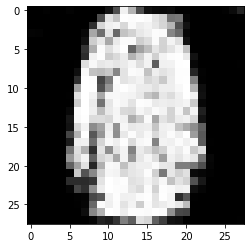

Number batches 78
94(0/78) D: 0.5779, G: 1.2324
94(1/78) D: 0.5769, G: 1.5001
94(2/78) D: 0.5446, G: 1.3242
94(3/78) D: 0.5362, G: 1.1492
94(4/78) D: 0.5438, G: 1.4638
94(5/78) D: 0.6022, G: 1.1578
94(6/78) D: 0.5863, G: 1.2156
94(7/78) D: 0.5468, G: 1.1103
94(8/78) D: 0.5034, G: 1.3923
94(9/78) D: 0.5837, G: 1.2276
94(10/78) D: 0.5219, G: 1.0025
94(11/78) D: 0.5523, G: 1.3066
94(12/78) D: 0.5561, G: 1.3082
94(13/78) D: 0.5635, G: 1.1676
94(14/78) D: 0.5352, G: 1.1645
94(15/78) D: 0.5178, G: 1.2272
94(16/78) D: 0.5374, G: 1.1841
94(17/78) D: 0.5965, G: 1.4769
94(18/78) D: 0.5788, G: 1.0931
94(19/78) D: 0.6015, G: 1.0979
94(20/78) D: 0.5836, G: 1.5712
94(21/78) D: 0.5530, G: 1.1270
94(22/78) D: 0.6675, G: 0.8971
94(23/78) D: 0.5739, G: 1.5305
94(24/78) D: 0.5512, G: 1.0586
94(25/78) D: 0.5239, G: 1.0738
94(26/78) D: 0.5585, G: 1.2435
94(27/78) D: 0.5665, G: 1.2921
94(28/78) D: 0.5370, G: 1.2917
94(29/78) D: 0.5738, G: 1.1313
94(30/78) D: 0.5483, G: 1.3537
94(31/78) D: 0.5867, G: 1.1069


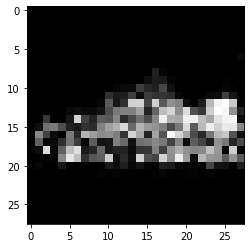

Number batches 78
95(0/78) D: 0.5707, G: 1.2505
95(1/78) D: 0.5251, G: 0.9913
95(2/78) D: 0.5522, G: 1.2712
95(3/78) D: 0.5860, G: 1.0771
95(4/78) D: 0.5892, G: 1.1245
95(5/78) D: 0.5026, G: 1.0987
95(6/78) D: 0.5876, G: 1.4171
95(7/78) D: 0.5244, G: 0.9752
95(8/78) D: 0.5609, G: 1.2404
95(9/78) D: 0.5670, G: 1.2930
95(10/78) D: 0.5720, G: 1.2498
95(11/78) D: 0.5281, G: 1.0839
95(12/78) D: 0.5151, G: 1.3628
95(13/78) D: 0.5714, G: 1.1534
95(14/78) D: 0.5673, G: 1.0302
95(15/78) D: 0.5956, G: 1.2350
95(16/78) D: 0.5573, G: 1.2588
95(17/78) D: 0.5761, G: 1.2028
95(18/78) D: 0.5330, G: 1.1613
95(19/78) D: 0.5485, G: 1.0750
95(20/78) D: 0.5173, G: 1.3183
95(21/78) D: 0.5290, G: 1.3492
95(22/78) D: 0.5342, G: 1.0570
95(23/78) D: 0.5542, G: 1.3020
95(24/78) D: 0.5272, G: 1.3559
95(25/78) D: 0.4909, G: 1.2032
95(26/78) D: 0.5311, G: 1.2801
95(27/78) D: 0.5341, G: 1.3298
95(28/78) D: 0.5032, G: 1.0625
95(29/78) D: 0.4959, G: 1.4234
95(30/78) D: 0.5060, G: 1.5258
95(31/78) D: 0.5015, G: 1.0543


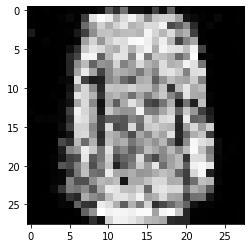

Number batches 78
96(0/78) D: 0.5160, G: 1.1019
96(1/78) D: 0.5940, G: 1.5800
96(2/78) D: 0.5832, G: 0.8081
96(3/78) D: 0.5900, G: 1.4222
96(4/78) D: 0.5617, G: 1.3300
96(5/78) D: 0.5391, G: 1.0747
96(6/78) D: 0.5261, G: 1.3266
96(7/78) D: 0.5924, G: 1.0764
96(8/78) D: 0.5723, G: 1.4037
96(9/78) D: 0.5730, G: 1.0275
96(10/78) D: 0.5047, G: 1.0773
96(11/78) D: 0.5666, G: 1.3154
96(12/78) D: 0.5047, G: 1.3422
96(13/78) D: 0.5688, G: 1.2046
96(14/78) D: 0.5828, G: 1.2135
96(15/78) D: 0.6198, G: 1.3365
96(16/78) D: 0.6379, G: 1.0209
96(17/78) D: 0.5920, G: 1.2686
96(18/78) D: 0.5495, G: 1.1171
96(19/78) D: 0.5810, G: 1.2638
96(20/78) D: 0.5168, G: 1.2267
96(21/78) D: 0.5597, G: 1.2205
96(22/78) D: 0.5390, G: 0.8962
96(23/78) D: 0.5630, G: 1.1876
96(24/78) D: 0.5290, G: 1.1945
96(25/78) D: 0.5510, G: 1.3391
96(26/78) D: 0.5475, G: 1.2838
96(27/78) D: 0.5484, G: 1.1383
96(28/78) D: 0.5387, G: 1.4613
96(29/78) D: 0.5484, G: 1.1233
96(30/78) D: 0.5675, G: 0.9819
96(31/78) D: 0.5696, G: 1.3302


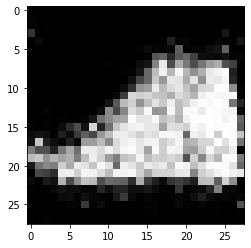

Number batches 78
97(0/78) D: 0.5786, G: 1.1703
97(1/78) D: 0.5509, G: 1.2882
97(2/78) D: 0.5418, G: 1.1523
97(3/78) D: 0.5390, G: 1.0343
97(4/78) D: 0.5465, G: 1.2534
97(5/78) D: 0.5896, G: 0.9901
97(6/78) D: 0.5605, G: 1.3485
97(7/78) D: 0.5673, G: 1.0529
97(8/78) D: 0.5918, G: 1.4019
97(9/78) D: 0.6185, G: 1.1656
97(10/78) D: 0.5472, G: 1.1930
97(11/78) D: 0.5367, G: 1.3315
97(12/78) D: 0.5533, G: 1.0426
97(13/78) D: 0.5536, G: 1.2311
97(14/78) D: 0.6301, G: 1.1113
97(15/78) D: 0.5810, G: 1.2671
97(16/78) D: 0.5714, G: 1.2118
97(17/78) D: 0.5679, G: 1.1944
97(18/78) D: 0.5625, G: 1.4079
97(19/78) D: 0.5863, G: 0.9431
97(20/78) D: 0.5828, G: 1.2969
97(21/78) D: 0.5480, G: 1.1552
97(22/78) D: 0.5667, G: 1.0849
97(23/78) D: 0.5752, G: 1.3966
97(24/78) D: 0.5295, G: 1.2357
97(25/78) D: 0.5450, G: 1.1186
97(26/78) D: 0.5248, G: 1.2151
97(27/78) D: 0.5591, G: 1.0330
97(28/78) D: 0.5306, G: 1.2734
97(29/78) D: 0.5313, G: 1.2356
97(30/78) D: 0.5569, G: 1.1508
97(31/78) D: 0.5065, G: 1.2623


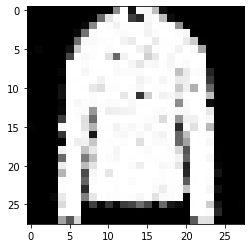

Number batches 78
98(0/78) D: 0.6137, G: 1.1553
98(1/78) D: 0.6036, G: 1.1856
98(2/78) D: 0.6045, G: 1.0983
98(3/78) D: 0.5516, G: 1.1044
98(4/78) D: 0.5506, G: 1.1738
98(5/78) D: 0.5258, G: 1.1185
98(6/78) D: 0.5275, G: 1.0239
98(7/78) D: 0.5706, G: 1.1848
98(8/78) D: 0.5755, G: 1.3272
98(9/78) D: 0.5911, G: 1.0137
98(10/78) D: 0.5811, G: 1.4317
98(11/78) D: 0.5820, G: 1.1834
98(12/78) D: 0.5386, G: 1.0978
98(13/78) D: 0.6101, G: 1.2831
98(14/78) D: 0.6252, G: 1.2241
98(15/78) D: 0.5785, G: 1.2802
98(16/78) D: 0.5792, G: 1.1260
98(17/78) D: 0.5819, G: 1.3133
98(18/78) D: 0.5854, G: 1.0497
98(19/78) D: 0.6236, G: 1.0770
98(20/78) D: 0.5675, G: 1.2641
98(21/78) D: 0.5340, G: 1.1570
98(22/78) D: 0.5965, G: 0.8784
98(23/78) D: 0.5877, G: 1.2895
98(24/78) D: 0.5300, G: 1.3082
98(25/78) D: 0.5860, G: 1.0972
98(26/78) D: 0.5648, G: 1.2045
98(27/78) D: 0.5373, G: 1.2247
98(28/78) D: 0.5402, G: 1.3581
98(29/78) D: 0.5536, G: 1.0561
98(30/78) D: 0.5833, G: 1.3128
98(31/78) D: 0.5526, G: 0.9852


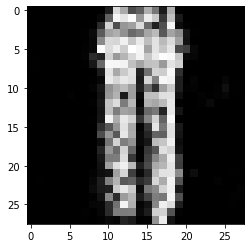

Number batches 78
99(0/78) D: 0.6014, G: 1.3511
99(1/78) D: 0.4953, G: 1.2003
99(2/78) D: 0.6228, G: 1.0715
99(3/78) D: 0.5531, G: 1.3573
99(4/78) D: 0.4993, G: 1.1159
99(5/78) D: 0.5266, G: 1.0569
99(6/78) D: 0.6122, G: 1.0831
99(7/78) D: 0.5202, G: 1.3491
99(8/78) D: 0.5367, G: 1.4872
99(9/78) D: 0.6201, G: 0.7723
99(10/78) D: 0.6178, G: 1.6519
99(11/78) D: 0.5887, G: 1.0675
99(12/78) D: 0.5850, G: 1.2211
99(13/78) D: 0.5506, G: 1.1918
99(14/78) D: 0.6145, G: 1.3029
99(15/78) D: 0.5826, G: 1.2027
99(16/78) D: 0.6441, G: 1.3549
99(17/78) D: 0.6082, G: 1.2080
99(18/78) D: 0.5433, G: 0.9041
99(19/78) D: 0.6686, G: 1.3695
99(20/78) D: 0.5806, G: 1.2333
99(21/78) D: 0.6223, G: 0.9748
99(22/78) D: 0.6050, G: 1.0560
99(23/78) D: 0.6210, G: 1.2911
99(24/78) D: 0.5243, G: 1.0456
99(25/78) D: 0.5666, G: 1.3134
99(26/78) D: 0.5437, G: 1.0868
99(27/78) D: 0.5822, G: 1.3171
99(28/78) D: 0.5147, G: 1.1174
99(29/78) D: 0.5037, G: 1.0000
99(30/78) D: 0.6126, G: 1.4278
99(31/78) D: 0.5689, G: 1.0774


In [33]:
batch_size = 128

for epoch in range(100):
    print('Epoch #%d' % epoch)
    
    # Generate an image and display it.
    disp_sample(g)
    
    num_batches = int(x_train.shape[0] / batch_size)
    print('Number batches %i' % num_batches)
    for i in range(num_batches):
        # A training iteration
        
        # Generate noise.
        noise = np.random.uniform(-1, 1, size=(batch_size, NOISE_DIM))
        
        # Generate images from the noise using the generator.
        generated_images = g.predict(noise)
        
        # Grab the image batch for this iteration. 
        real_images = x_train[i * batch_size: (i+1) * batch_size]
        
        # Contains the real and fake images.
        X = np.concatenate([generated_images, real_images])
        
        # Labels if the sample is real (1) or not real (0). 
        y = np.concatenate([np.zeros(generated_images.shape[0]), np.ones(real_images.shape[0])])

        # Train the discriminator using the generated images and the real images.
        d.trainable = True
        d_loss = d.train_on_batch(X, y)
        d.trainable = False
        
        # Generate more noise to feed into the full gan network to train the generative portion. 
        noise = np.random.uniform(-1, 1, size=(batch_size, NOISE_DIM))

        # Get the g_loss
        g_loss = dg.train_on_batch(noise, np.ones(noise.shape[0]))
        
        print('%i(%i/%i) D: %.4f, G: %.4f' % (epoch, i, num_batches, d_loss, g_loss))